In [1]:
from google.colab import files

uploaded = files.upload()

Saving Election_Data.xlsx to Election_Data.xlsx


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [3]:
election_df = pd.read_excel('Election_Data.xlsx', sheet_name = 'Election_Dataset_Two Classes')
election_df.head(15)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [4]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


Out of 10 columns in election_df, 8 columns are of integer datatype and 2 columns are of object datatype

In [5]:
election_df.isnull().sum()

,0
Unnamed: 0,0
vote,0
age,0
economic.cond.national,0
economic.cond.household,0
Blair,0
Hague,0
Europe,0
political.knowledge,0
gender,0


election_df doesn't contain missing data

In [6]:
election_df[election_df.duplicated()]

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


election_df doesn't contain any duplicate data point(row)

In [7]:
# Since 'Unnamed: 0' column is of no significance, hence 'Unnamed: 0' is being removed from election_df

election_df.drop('Unnamed: 0', axis = 1, inplace = True)
election_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


**Exploratory Data Analysis**

In [8]:
print('Number of parties contesting the election are {} and they are {}\n'.format(election_df['vote'].nunique(), election_df['vote'].unique()))

print('Votes each party secured are as follows {}-\n'.format(election_df['vote'].value_counts()))

print('Votes each party secured in % are as follows {}-\n'.format(election_df['vote'].value_counts(normalize = True)))

Number of parties contesting the election are 2 and they are ['Labour' 'Conservative']

Votes each party secured are as follows vote
Labour          1063
Conservative     462
Name: count, dtype: int64-

Votes each party secured in % are as follows vote
Labour          0.697049
Conservative    0.302951
Name: proportion, dtype: float64-



Text(0.5, 1.0, 'Histplot showing the distribution of votes secured by the contesting parties.')

<Figure size 300x400 with 0 Axes>

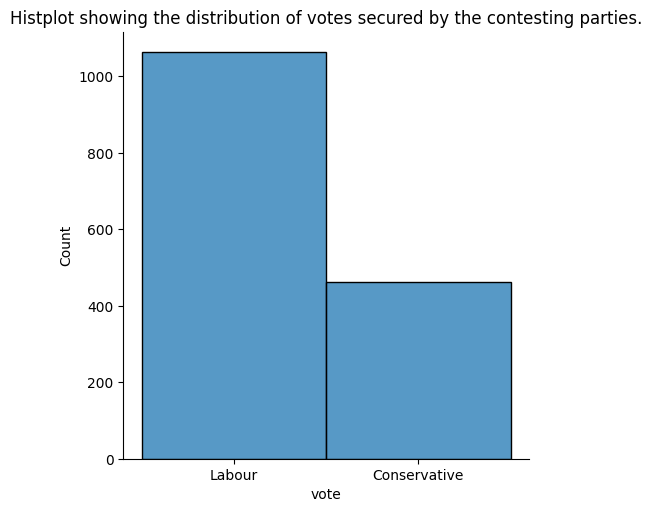

In [9]:
plt.figure(figsize = (3, 4))
sns.displot(x = 'vote', data = election_df, kind = 'hist')
plt.title('Histplot showing the distribution of votes secured by the contesting parties.')

* The election data involves two parties, Labour and Conservative, with Labour securing approximately 70% of the votes (1063 votes) and Conservative securing 30% (462 votes).

In [10]:
print('The voters in election_df are of age-\n{}\n'.format(election_df['age'].unique()))

print('Number of voters of different age groups-\n{}\n'.format(election_df['age'].value_counts()))

print('Percentage of voters of different age groups-\n{}\n'.format(election_df['age'].value_counts(normalize = True)))

The voters in election_df are of age-
[43 36 35 24 41 47 57 77 39 70 66 59 51 79 37 38 53 44 60 56 61 55 62 76
 27 52 48 72 42 54 50 46 33 58 64 32 71 28 34 68 67 88 40 78 65 74 82 49
 84 81 45 69 31 63 89 83 29 92 73 75 26 90 25 80 30 86 85 87 93 91]

Number of voters of different age groups-
age
37    42
35    39
49    39
47    38
54    37
      ..
87     3
92     2
90     1
93     1
91     1
Name: count, Length: 70, dtype: int64

Percentage of voters of different age groups-
age
37    0.027541
35    0.025574
49    0.025574
47    0.024918
54    0.024262
        ...   
87    0.001967
92    0.001311
90    0.000656
93    0.000656
91    0.000656
Name: proportion, Length: 70, dtype: float64



Text(0.5, 1.0, 'Countplot showing the number of voters of different age.')

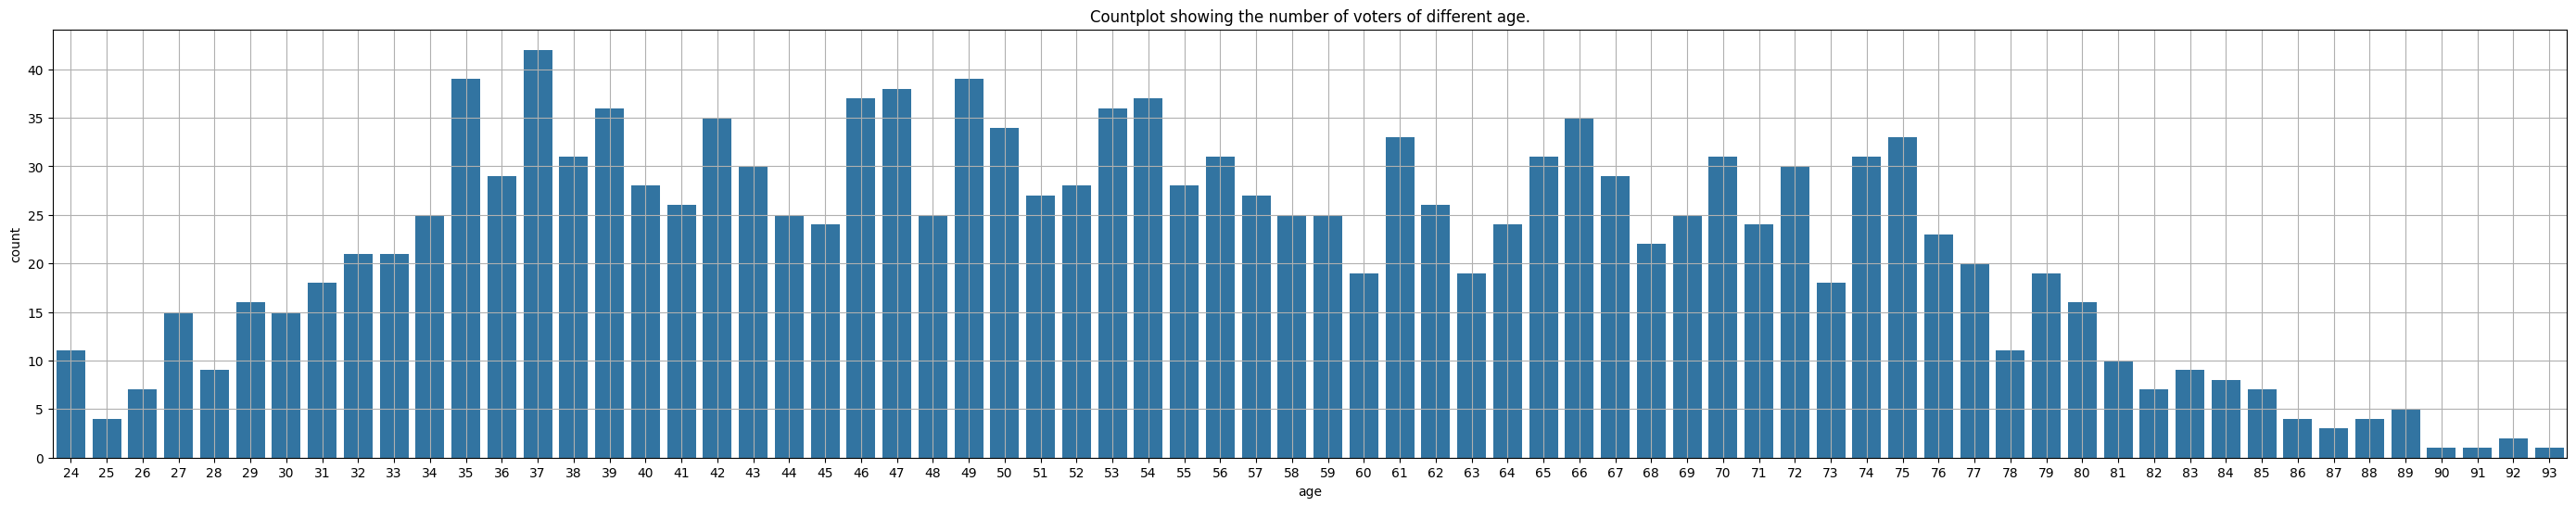

In [11]:
plt.figure(figsize = (35, 6))
sns.countplot(x = 'age', data = election_df)
plt.grid()
plt.title('Countplot showing the number of voters of different age.')

Text(0.5, 1.0, 'Number of voters of all age who voted for the Conservative and Labour.')

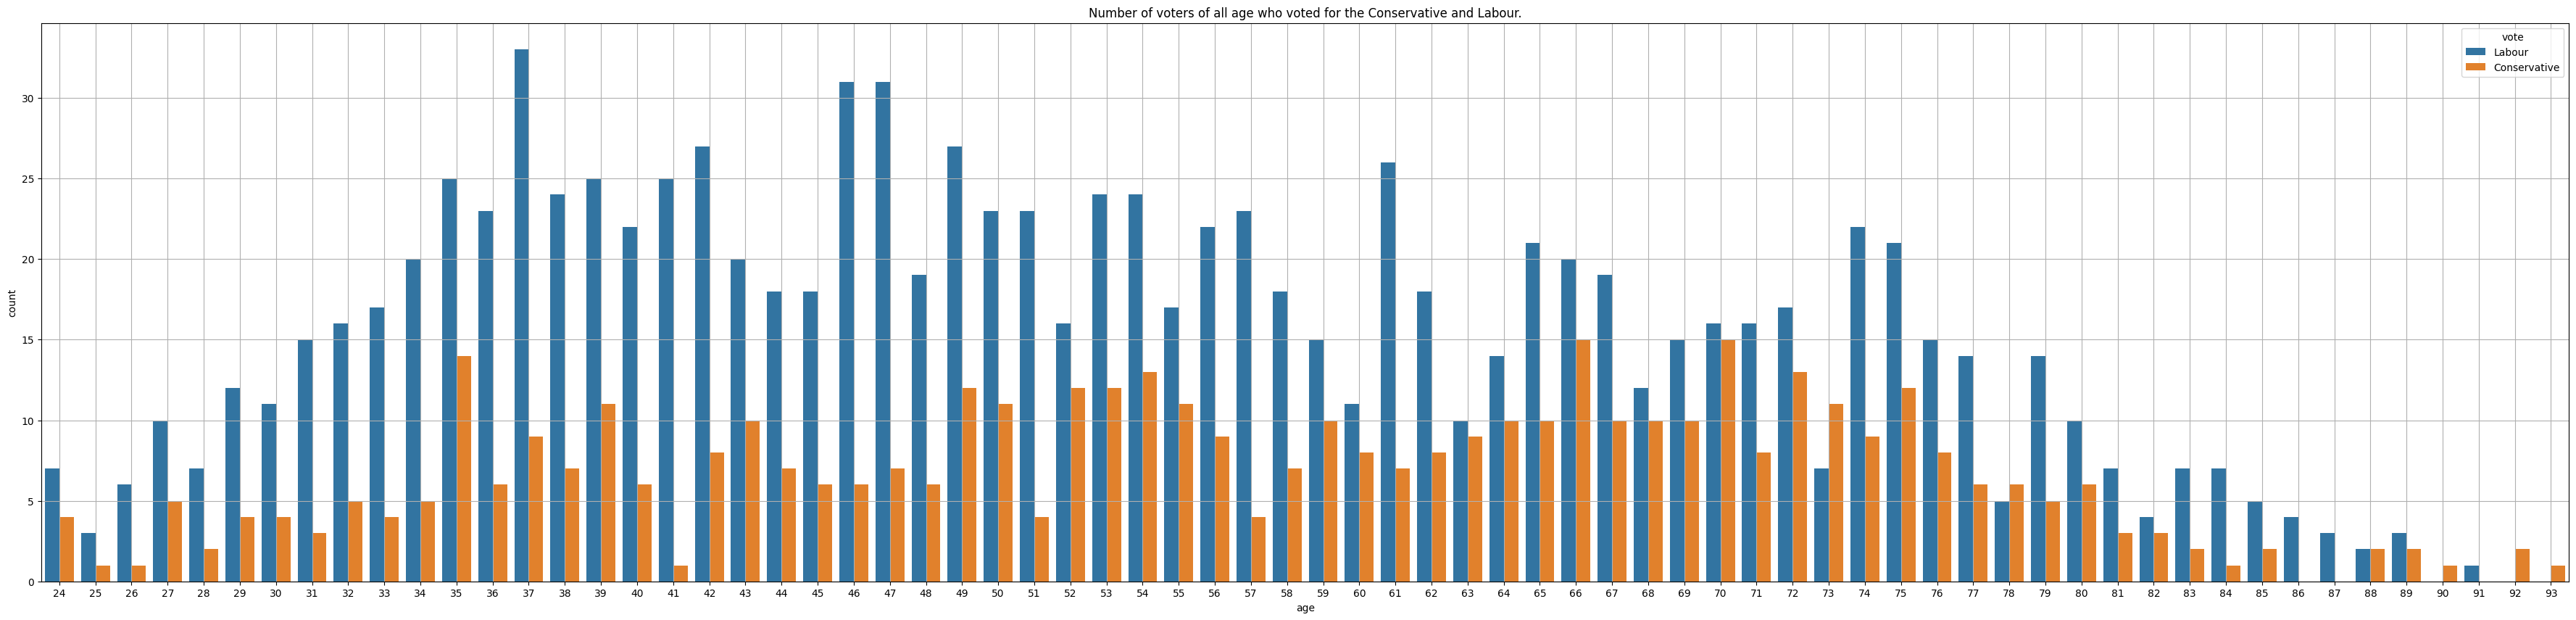

In [12]:
plt.figure(figsize = (45, 10))
sns.countplot(x = 'age', data = election_df, hue = 'vote')
plt.grid()
plt.title('Number of voters of all age who voted for the Conservative and Labour.')

* Voter ages range from 24 to 93, with varying numbers of voters in each age group.

* The majority of voters, except those aged 90, 92, and 93, had voted for the Labour Party.

* Voters aged 90, 92, & 93 had voted for the Conservative party.

In [13]:
print('Number of male and female voters in election_df are-\n{}\n'.format(election_df['gender'].value_counts()))

print('Percentage of male and female voters in election_df are-\n{}\n'.format(election_df['gender'].value_counts(normalize = True)))

Number of male and female voters in election_df are-
gender
female    812
male      713
Name: count, dtype: int64

Percentage of male and female voters in election_df are-
gender
female    0.532459
male      0.467541
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Number of male and female voters in election_df.')

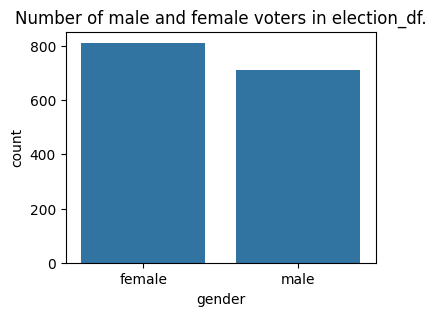

In [14]:
plt.figure(figsize = (4, 3))
sns.countplot(x = 'gender', data = election_df)
plt.title("Number of male and female voters in election_df.")

Text(0.5, 1.0, 'Number of male and female voters who voted for the Conservative and Labour party.')

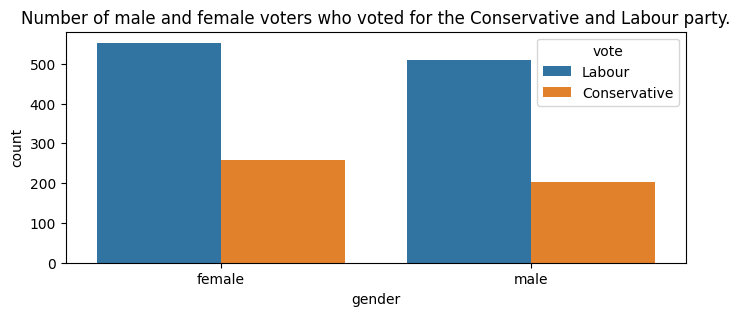

In [15]:
plt.figure(figsize = (8, 3))
sns.countplot(x = 'gender', data = election_df, hue = 'vote')
plt.title("Number of male and female voters who voted for the Conservative and Labour party.")

* The election data includes both male and female voters, with females comprising 53.25% and males 46.75% of the electorate.

* The majority of both male and female voters supported the Labour Party; however, the majority of voters who voted for the Conservative party are female voters.

In [16]:
#Assessment of current national economic condition

print('The assessment of the current national economic condition by the voters are as follows-\n{}\n'.format(election_df['economic.cond.national'].value_counts()))

print('The assessment of the current national economic condition by the voters in percentage are as follows-\n{}\n'.format(election_df['economic.cond.national'].value_counts(normalize = 1)))

The assessment of the current national economic condition by the voters are as follows-
economic.cond.national
3    607
4    542
2    257
5     82
1     37
Name: count, dtype: int64

The assessment of the current national economic condition by the voters in percentage are as follows-
economic.cond.national
3    0.398033
4    0.355410
2    0.168525
5    0.053770
1    0.024262
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Assessment of current national economic contition by the voters')

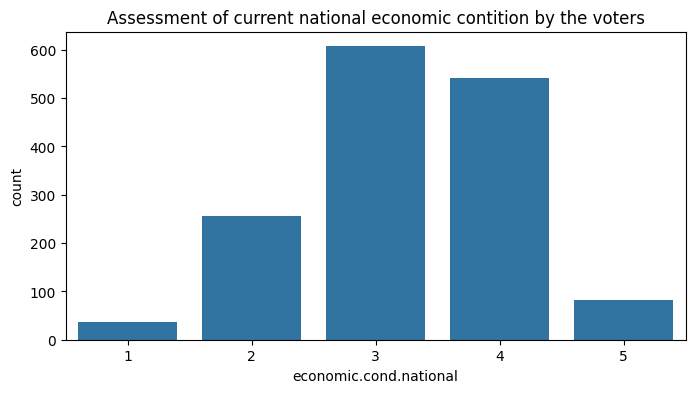

In [17]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'economic.cond.national', data = election_df)
plt.title('Assessment of current national economic contition by the voters')

Text(0.5, 1.0, 'Assessment of current national economic contition by the voters and the party they voted')

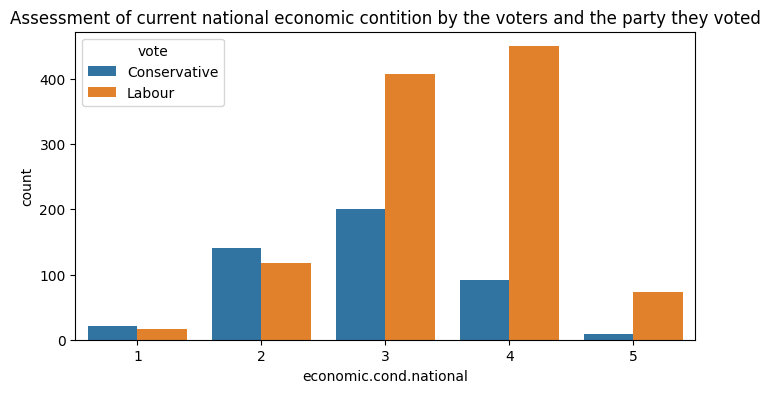

In [18]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'economic.cond.national', data = election_df, hue = 'vote')
plt.title('Assessment of current national economic contition by the voters and the party they voted')

* The majority of voters with a strong assessment of the national economic condition voted for the Labour Party, while those with a weak assessment favored the Conservative Party.

In [19]:
#Assessment of current household economic condition

print('The assessment of the current household economic condition by the voters are as follows-\n{}\n'.format(election_df['economic.cond.household'].value_counts()))

print('The assessment of the current household economic condition by the voters in percentage are as follows-\n{}\n'.format(election_df['economic.cond.household'].value_counts(normalize = 1)))

The assessment of the current household economic condition by the voters are as follows-
economic.cond.household
3    648
4    440
2    280
5     92
1     65
Name: count, dtype: int64

The assessment of the current household economic condition by the voters in percentage are as follows-
economic.cond.household
3    0.424918
4    0.288525
2    0.183607
5    0.060328
1    0.042623
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Assessment of current household economic contition by the voters')

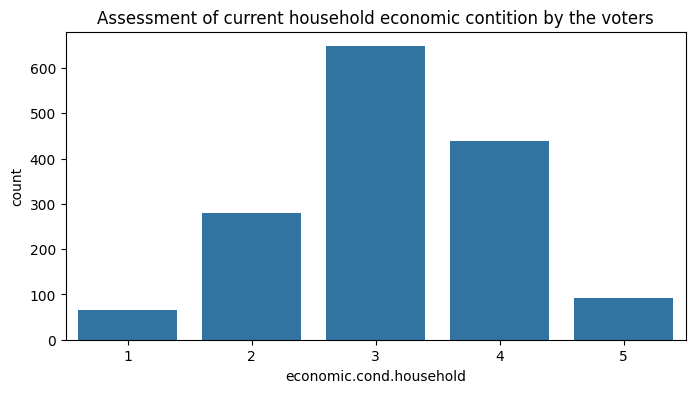

In [20]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'economic.cond.household', data = election_df)
plt.title('Assessment of current household economic contition by the voters')

Text(0.5, 1.0, 'Assessment of current household economic contition by the voters and the party they voted')

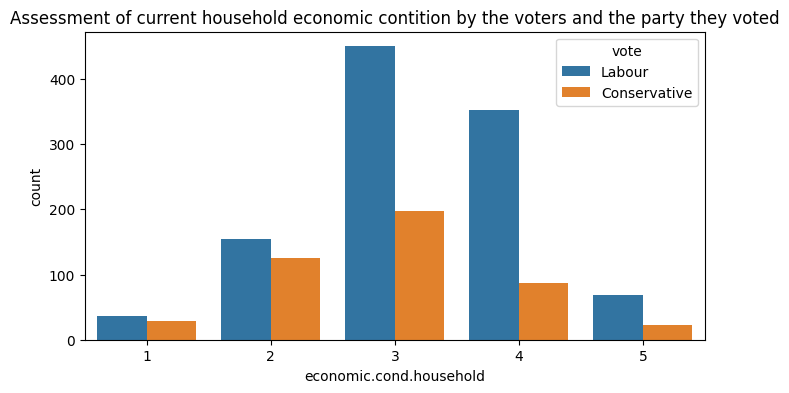

In [21]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'economic.cond.household', data = election_df, hue = 'vote')
plt.title('Assessment of current household economic contition by the voters and the party they voted')

* The majority of voters, regardless of their household economic assessment, voted for the Labour Party, suggesting that household economic conditions were not a strong determinant in vote choice.

In [22]:
#Assessment of the Labour leader

print('The assessment of the Labour leader by the voters are as follows-\n{}\n'.format(election_df['Blair'].value_counts()))

print('The assessment of the Labour leader by the voters in percentage are as follows-\n{}\n'.format(election_df['Blair'].value_counts(normalize = 1)))

The assessment of the Labour leader by the voters are as follows-
Blair
4    836
2    438
5    153
1     97
3      1
Name: count, dtype: int64

The assessment of the Labour leader by the voters in percentage are as follows-
Blair
4    0.548197
2    0.287213
5    0.100328
1    0.063607
3    0.000656
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Assessment of the Labour party leader by the voters')

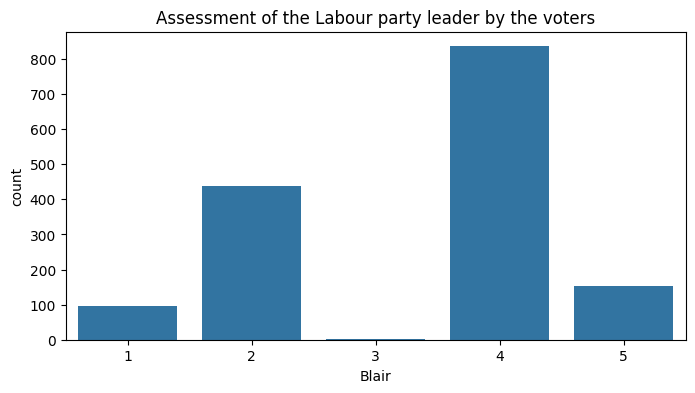

In [23]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'Blair', data = election_df)
plt.title('Assessment of the Labour party leader by the voters')

Text(0.5, 1.0, 'Assessment of the Labour party leader by the voters and the party they voted')

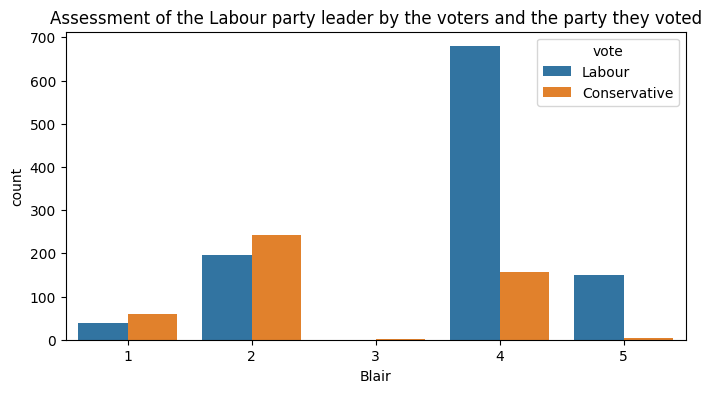

In [24]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'Blair', data = election_df, hue = 'vote')
plt.title('Assessment of the Labour party leader by the voters and the party they voted')

* A strong assessment of the Labour leader correlated with votes for the Labour party

In [25]:
#Assessment of the Conservative leader

print('The assessment of the Conservative leader by the voters are as follows-\n{}\n'.format(election_df['Hague'].value_counts()))

print('The assessment of the Conservative leader by the voters in percentage are as follows-\n{}\n'.format(election_df['Hague'].value_counts(normalize = 1)))

The assessment of the Conservative leader by the voters are as follows-
Hague
2    624
4    558
1    233
5     73
3     37
Name: count, dtype: int64

The assessment of the Conservative leader by the voters in percentage are as follows-
Hague
2    0.409180
4    0.365902
1    0.152787
5    0.047869
3    0.024262
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Assessment of the Conservative party leader by the voters')

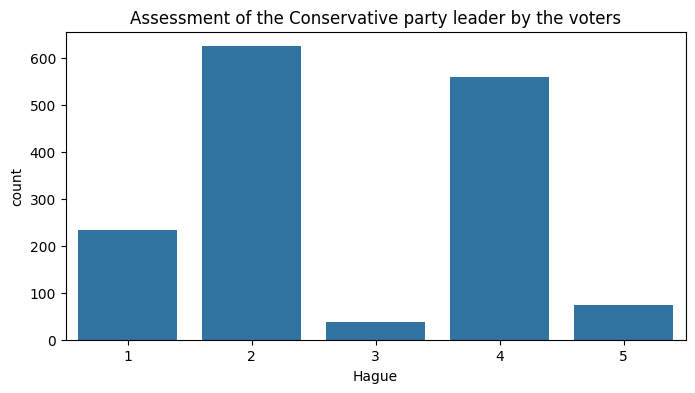

In [26]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'Hague', data = election_df)
plt.title('Assessment of the Conservative party leader by the voters')

Text(0.5, 1.0, 'Assessment of the Conservative party leader by the voters and the party they voted')

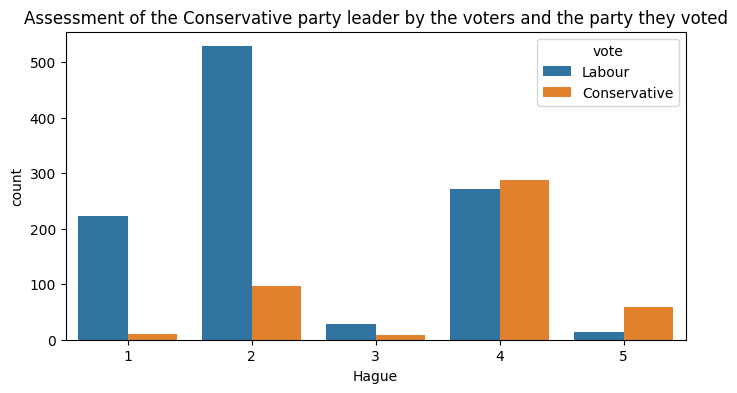

In [27]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'Hague', data = election_df, hue = 'vote')
plt.title('Assessment of the Conservative party leader by the voters and the party they voted')

* A weak assessment correlated with votes for the Conservative party.

In [28]:
#Voters attitude toward European integration

print('The assessment of the voters attitude toward European integration are as follows-\n{}\n'.format(election_df['Europe'].value_counts()))

print('The assessment of the voters attitude toward European integration in percentage are as follows-\n{}\n'.format(election_df['Europe'].value_counts(normalize = 1)))

The assessment of the voters attitude toward European integration are as follows-
Europe
11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: count, dtype: int64

The assessment of the voters attitude toward European integration in percentage are as follows-
Europe
11    0.221639
6     0.137049
3     0.084590
4     0.083279
5     0.081311
8     0.073443
9     0.072787
1     0.071475
10    0.066230
7     0.056393
2     0.051803
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Assessment of the voters attitude toward European integration')

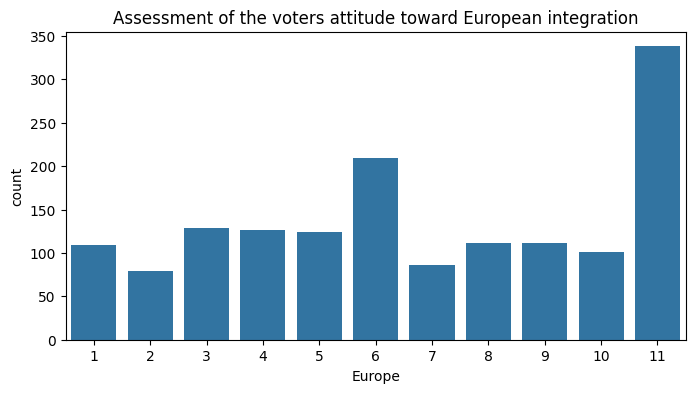

In [29]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'Europe', data = election_df)
plt.title('Assessment of the voters attitude toward European integration')

Text(0.5, 1.0, 'Assessment of the voters attitude toward European integration and the party they voted')

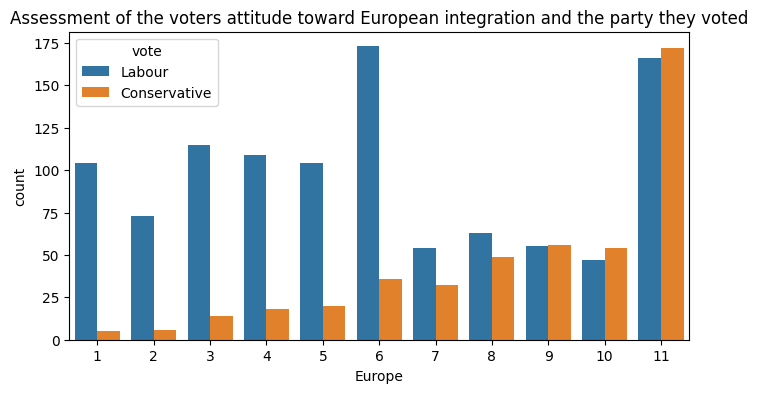

In [30]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'Europe', data = election_df, hue = 'vote')
plt.title('Assessment of the voters attitude toward European integration and the party they voted')

* Voters who rated European integration from 1 to 8 mostly voted for Labour, while those who rated it from 9 to 11 favored the Conservative party.

In [31]:
# Knowledge of parties positions on European integration

print('Voters knowledge of parties position on European integration-\n{}\n'.format(election_df['political.knowledge'].value_counts()))

print('Voters knowledge of parties position on European integration in percentage are as follows-\n{}\n'.format(election_df['political.knowledge'].value_counts(normalize = 1)))

Voters knowledge of parties position on European integration-
political.knowledge
2    782
0    455
3    250
1     38
Name: count, dtype: int64

Voters knowledge of parties position on European integration in percentage are as follows-
political.knowledge
2    0.512787
0    0.298361
3    0.163934
1    0.024918
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Voters knowledge of parties position on European integration')

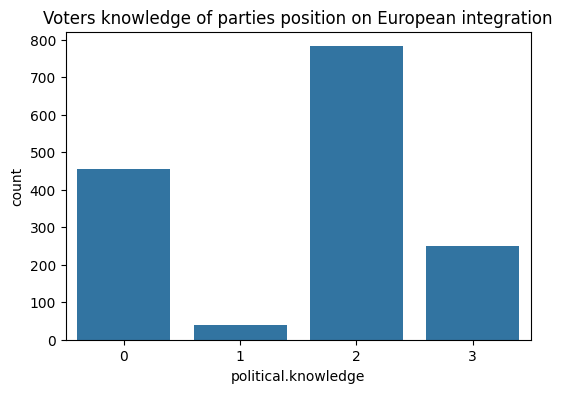

In [32]:
plt.figure(figsize = (6, 4))
sns.countplot(x = 'political.knowledge', data = election_df)
plt.title('Voters knowledge of parties position on European integration')

Text(0.5, 1.0, 'Voters knowledge of parties position on European integration and the party they voted')

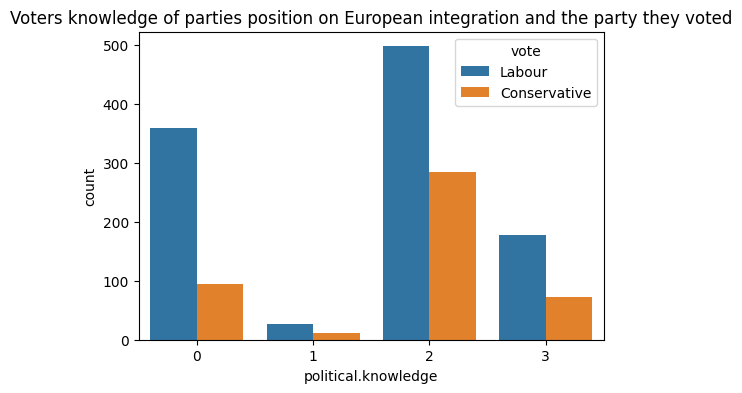

In [33]:
plt.figure(figsize = (6, 4))
sns.countplot(x = 'political.knowledge', data = election_df, hue = 'vote')
plt.title('Voters knowledge of parties position on European integration and the party they voted')

* The majority of voters, regardless of their political knowledge, voted for the Labour Party, suggesting that political knowledge is not a strong determinant in vote choice .

In [34]:
# Descriptive statistics of election_df

election_df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


<Axes: >

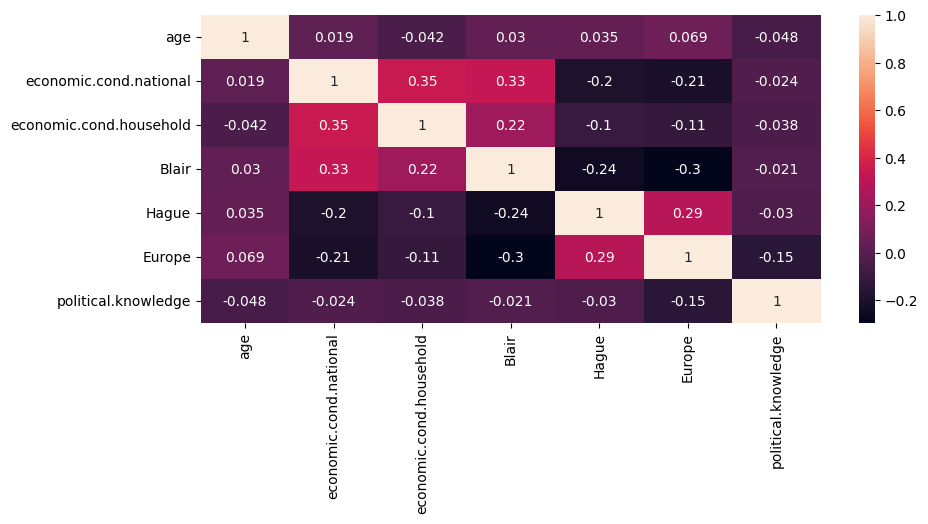

In [35]:
plt.figure(figsize = (10, 4))
sns.heatmap(election_df[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']].corr(), annot = True)

In [36]:
for col in election_df.columns:
  if election_df[col].dtype == 'object':
    print('feature: ', col)
    print(pd.Categorical(election_df[col].unique()))
    print(pd.Categorical(election_df[col].unique()).codes)
    election_df[col] = pd.Categorical(election_df[col]).codes
    print('\n')


feature:  vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature:  gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]




In [37]:
X = election_df[['age', 'economic.cond.national',	'economic.cond.household', 'Blair',	'Hague', 'Europe', 'political.knowledge',	'gender']]
y = election_df['vote']

In [38]:
X

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...
1520,67,5,3,2,4,11,3,1
1521,73,2,2,4,4,8,2,1
1522,37,3,3,5,4,2,2,1
1523,61,3,3,1,4,11,2,1


In [39]:
y.head(10)

,vote
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [41]:
X_train

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1453,62,3,3,2,2,11,2,0
275,49,3,3,2,2,8,0,0
1130,74,4,4,4,4,7,0,1
1153,57,2,3,4,2,6,2,0
1172,24,4,5,4,4,6,0,1
...,...,...,...,...,...,...,...,...
715,67,4,3,5,2,2,2,1
905,27,5,5,2,1,4,3,1
1096,34,4,5,4,4,7,2,0
235,36,4,4,4,2,7,2,0


In [42]:
y_train

,vote
1453,1
275,0
1130,1
1153,1
1172,0
...,...
715,1
905,1
1096,1
235,1


In [43]:
X_test

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
91,49,1,1,2,4,8,3,0
1194,34,3,3,2,4,9,2,1
201,51,2,2,4,4,4,2,1
613,30,2,3,4,4,7,3,1
283,42,3,3,2,2,9,0,1
...,...,...,...,...,...,...,...,...
1196,46,3,4,5,2,3,2,0
205,45,4,4,4,2,11,3,1
1330,54,3,2,2,5,9,3,1
997,47,4,4,4,1,4,3,1


In [44]:
y_test

,vote
91,0
1194,1
201,1
613,0
283,1
...,...
1196,1
205,0
1330,0
997,1


In [45]:
# KNeighborsClassifier model

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
# knn_model prediction on train data

y_train_predict = knn_model.predict(X_train)

In [47]:
# knn_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,244,88
1,63,672


In [48]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       332
           1       0.88      0.91      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.82      0.83      1067
weighted avg       0.86      0.86      0.86      1067



In [49]:
y_train_predict_prob = knn_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)
print('roc_auc_score of knn_model on train data: {}'.format(roc_score))

roc_auc_score of knn_model on train data: 0.9222502253913615


Text(0.5, 1.0, 'ROC curve of knn_model on training data.')

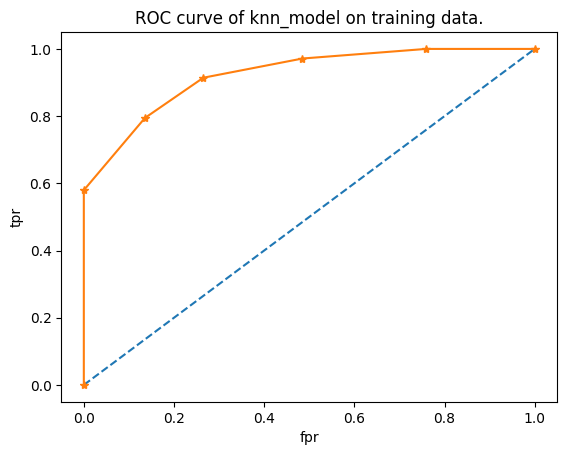

In [50]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of knn_model on training data.')

In [51]:
# knn_model prediction on test data

y_test_predict = knn_model.predict(X_test)

In [52]:
# knn_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,81,49
1,51,277


In [53]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.61      0.62      0.62       130
           1       0.85      0.84      0.85       328

    accuracy                           0.78       458
   macro avg       0.73      0.73      0.73       458
weighted avg       0.78      0.78      0.78       458



In [54]:
y_test_predict_prob = knn_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of knn_model on test data: {}'.format(roc_score))

roc_auc_score of knn_model on test data: 0.8295497185741088


Text(0.5, 1.0, 'ROC curve of knn_model on test data.')

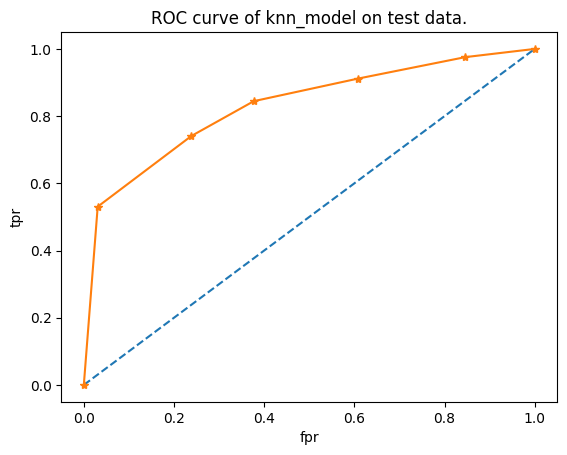

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of knn_model on test data.')

**Training Set Performance:**
1. The KNeighborsClassifier model achieves an accuracy of 0.86 on the training set.
2. Metrics for class 0 are moderate (precision=0.79, recall=0.73, F1-score=0.76), while class 1 metrics are robust (precision=0.88, recall=0.91, F1-score=0.90).
3. The ROC AUC score is 0.92, indicating strong discrimination ability.

**Test Set Performance:**
1. The KNeighborsClassifier model achieves an accuracy of 0.78 on the test set.
2. Metrics for class 0 are weak (precision=0.61, recall=0.62, F1-score=0.62), while class 1 metrics are robust (precision=0.85, recall=0.84, F1-score=0.85).
3. The ROC AUC score is 0.83, indicating strong discrimination ability.

**Analysis:** KNeighborsClassifier model exhibits overfitting and shows a drop in performance on the test set, particularly for class 0, indicating potential overfitting and challenges in handling imbalanced data and requires extensive tuning to generalize well.

In [56]:
# Tuning the parameters of the knn_model for better performance.

grid_params = {
                'n_neighbors': [5, 10, 15, 20, 25],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size': [30, 40, 50, 60]
}

grid_search = GridSearchCV(estimator = knn_model, param_grid = grid_params, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

reg_knn_model = grid_search.best_estimator_

Best Hyperparameters: {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 15}


In [57]:
# reg_knn_model prediction on train data

y_train_predict = reg_knn_model.predict(X_train)

In [58]:
# reg_knn_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,213,119
1,65,670


In [59]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70       332
           1       0.85      0.91      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067



In [60]:
y_train_predict_prob = reg_knn_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)
print('roc_auc_score of reg_knn_model on train data: {}'.format(roc_score))

roc_auc_score of reg_knn_model on train data: 0.893289484468486


Text(0.5, 1.0, 'ROC curve of reg_knn_model on train data.')

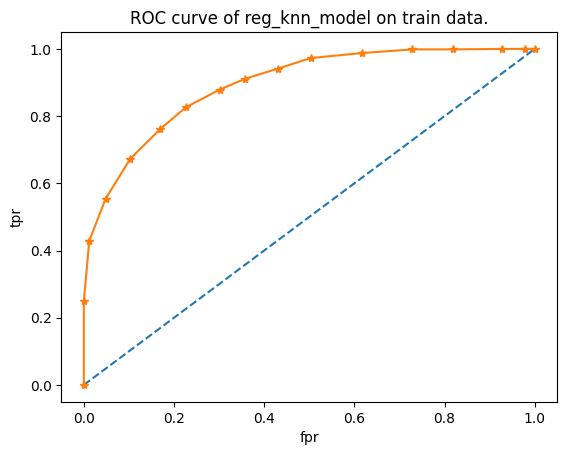

In [61]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of reg_knn_model on train data.')

In [62]:
# reg_knn_model prediction on test data

y_test_predict = reg_knn_model.predict(X_test)

In [63]:
# reg_knn_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,83,47
1,40,288


In [64]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.67      0.64      0.66       130
           1       0.86      0.88      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.76       458
weighted avg       0.81      0.81      0.81       458



In [65]:
y_test_predict_prob = reg_knn_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)
print('roc_auc_score of reg_knn_model on test data: {}'.format(roc_score))

roc_auc_score of reg_knn_model on test data: 0.8696646341463413


Text(0.5, 1.0, 'ROC curve of reg_knn_model on test data.')

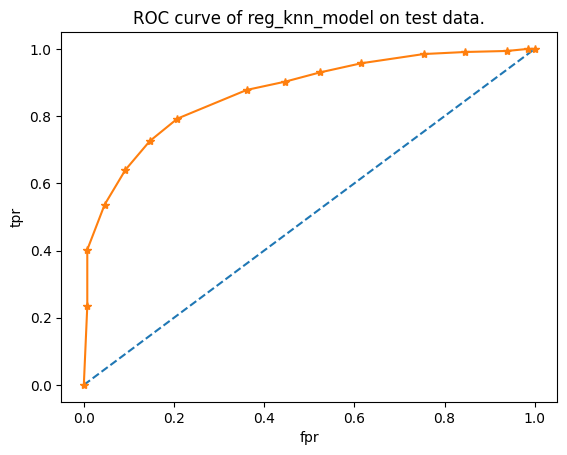

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of reg_knn_model on test data.')

**Training Set Performance:**
1. The regularized KNeighborsClassifier model achieves an accuracy of 0.83 on the training set.
2. Metrics for class 0 are moderate (precision=0.77, recall=0.64, F1-score=0.70), while class 1 metrics are robust (precision=0.85, recall=0.91, F1-score=0.88).
3. The ROC AUC score is 0.89, indicating strong discrimination ability.

**Test Set Performance:**
1. The regularized KNeighborsClassifier model achieves an accuracy of 0.81 on the test set.
2. Metrics for class 0 are moderate (precision=0.67, recall=0.64, F1-score=0.66), while class 1 metrics are robust (precision=0.86, recall=0.88, F1-score=0.87).
3. The ROC AUC score is 0.87, indicating strong discrimination ability.

**Analysis:** The regularized KNeighborsClassifier model shows consistent performance across both sets, shows a drop in performance on the test set, particularly for class 0, indicating challenges in handling imbalanced data

**GaussianNB model**


In [67]:
# GaussianNB model

gaussian_nb_model = GaussianNB()
gaussian_nb_model.fit(X_train, y_train)

GaussianNB()

In [68]:
# gaussian_nb_model prediction on train data

y_train_predict = gaussian_nb_model.predict(X_train)

In [69]:
# gaussian_nb_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,240,92
1,86,649


In [70]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [71]:
y_train_predict_prob = gaussian_nb_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)
print('roc_auc_score of gaussian_nb_model on train data: {}'.format(roc_score))

roc_auc_score of gaussian_nb_model on train data: 0.8864703712810426


Text(0.5, 1.0, 'ROC curve of gaussian_nb_model on training data.')

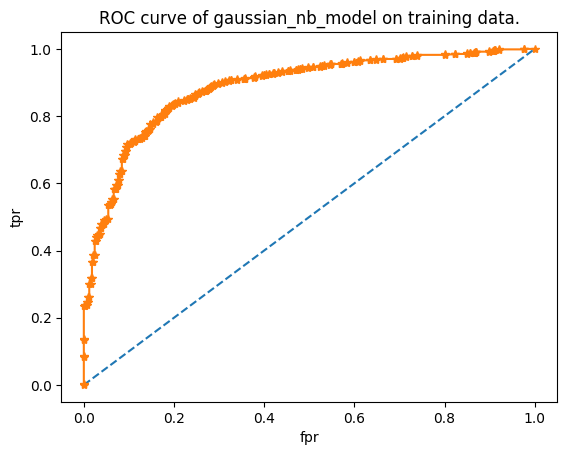

In [72]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of gaussian_nb_model on training data.')

In [73]:
# gaussian_nb_model prediction on test data

y_test_predict = gaussian_nb_model.predict(X_test)

In [74]:
# gaussian_nb_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,94,36
1,44,284


In [75]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



In [76]:
y_test_predict_prob = gaussian_nb_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)
print('roc_auc_score of gaussian_nb_model on test data: {}'.format(roc_score))

roc_auc_score of gaussian_nb_model on test data: 0.8845450281425891


Text(0.5, 1.0, 'ROC curve of gaussian_nb_model on test data.')

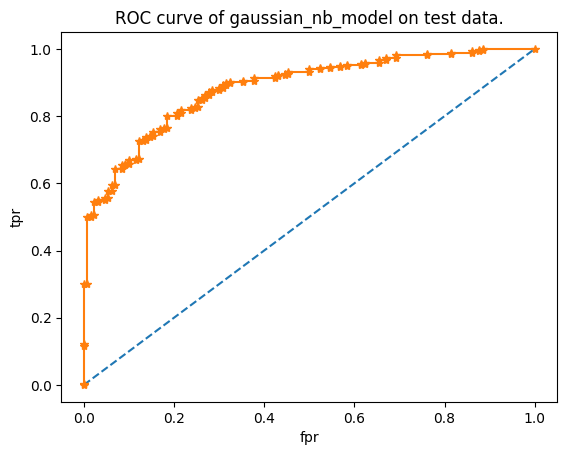

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of gaussian_nb_model on test data.')

**Training Set Performance:**
1. The GaussianNB model achieves an accuracy of 0.83 on the training set.
2. Class 0 metrics are moderate (precision=0.74, recall=0.72, F1-score=0.73), while Class 1 metrics are robust (precision=0.88, recall=0.88, F1-score=0.88),
3. The ROC AUC score is 0.87, demonstrating strong predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.83.
2. Class 0 metrics are moderate (precision=0.68, recall=0.72, F1-score=0.70), while class 1 metrics are robust (precision=0.89, recall=0.87, F1-score=0.88).
3. The ROC AUC score is 0.88, demonstrating strong predictive power.

**Analysis:**: The GaussianNB model maintains consistent performance across training and test sets, suggesting good generalization capabilities. The model shows drop in performance on the test set particullarly class 0 indicating challengesin handling imbalanced data.

**Decision Tree Classifier**

In [78]:
# Decision Tree Classifier

dtcl = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
dtcl.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [79]:
from google.colab import drive

drive.mount('/content/drive')
file = open('/content/drive/My Drive/Colab Notebooks/vote_tree.dot', 'w')
train_char_label = ['1', '0']
dot_data = export_graphviz(dtcl, out_file = file, feature_names = list(X_train), class_names = list(train_char_label))
file.close()

Mounted at /content/drive


In [80]:
# dtcl prediction on train data

y_train_predict = dtcl.predict(X_train)

In [81]:
# dtcl performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,332,0
1,1,734


In [82]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [83]:
y_train_predict_prob = dtcl.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)
print('roc_auc_score of dtcl on train data: {}'.format(roc_score))

roc_auc_score of dtcl on train data: 0.9999979509876239


Text(0.5, 1.0, 'ROC curve of dtcl on training data.')

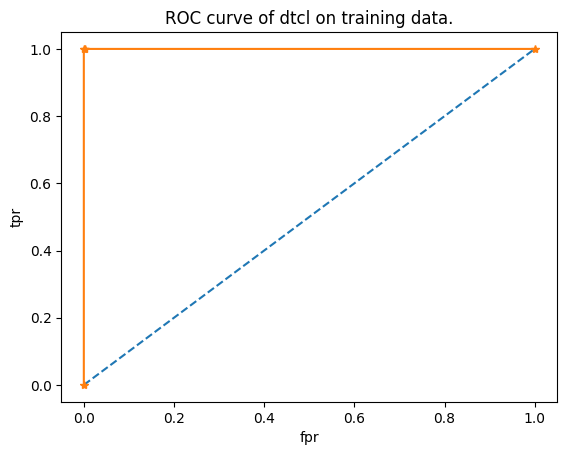

In [84]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of dtcl on training data.')

In [85]:
# dtcl prediction on test data

y_test_predict = dtcl.predict(X_test)

In [86]:
# dtcl performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,77,53
1,61,267


In [87]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.56      0.59      0.57       130
           1       0.83      0.81      0.82       328

    accuracy                           0.75       458
   macro avg       0.70      0.70      0.70       458
weighted avg       0.76      0.75      0.75       458



In [88]:
y_test_predict_prob = dtcl.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)
print('roc_auc_score of dtcl on test data: {}'.format(roc_score))

roc_auc_score of dtcl on test data: 0.7031660412757974


Text(0.5, 1.0, 'ROC curve of dtcl on test data.')

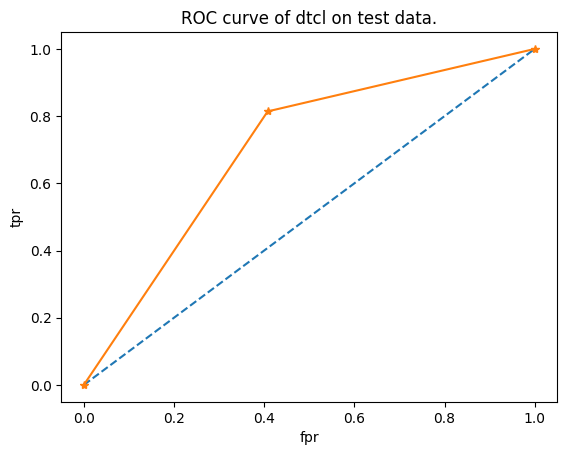

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of dtcl on test data.')

**Training Set Performance:**
1. The DecisionTreeClassifier model achieves an accuracy of 1.00 on the training set.
2. Class 0 and Class1 metrics are exceptional (precision=1.00, recall=1.00, F1-score=1.00)
3. The ROC AUC score is 1.00, demonstrating exceptional predictive power.

**Test Set Performance:**
1. On the test set, the accuracy drops significantly at 0.75 .
2. Class 0 metrics are poor (precision=0.56, recall=0.59, F1-score=0.57), while class 1 metrics are robust (precision=0.83, recall=0.81, F1-score=0.82).
3. The ROC AUC score is 0.70, demonstrating moderate predictive power.

**Analysis:** The DecisionTreeClassifier model exhibits stark contrast across training and test sets suggests overfitting, where the model learns the training data too well, including noise, and fails to generalize to new data particularly for class 0.

In [90]:
# Tuning the parameters of the dtcl for better performance.

params = {
                'criterion': ['gini', 'entropy', 'log_loss'],
                'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                'min_samples_split': [2, 5, 7, 9, 11, 13, 15, 17, 19],
                'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                'max_features':[3, 4, 5, 'log2', 'sqrt']
}

grid_search = GridSearchCV(estimator = dtcl, param_grid = params, cv = 7, scoring ='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

reg_dtcl_model = grid_search.best_estimator_

# Best Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 17}

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 17}


In [91]:
# reg_dtcl_model prediction on train data

y_train_predict = reg_dtcl_model.predict(X_train)

In [92]:
# reg_dtcl_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,251,81
1,77,658


In [93]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       332
           1       0.89      0.90      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.83      0.83      1067
weighted avg       0.85      0.85      0.85      1067



In [94]:
y_train_predict_prob = reg_dtcl_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of reg_dtcl_model on train data: {}'.format(roc_score))

roc_auc_score of reg_dtcl_model on train data: 0.9225780673715269


Text(0.5, 1.0, 'ROC curve of reg_dtcl_model on training data.')

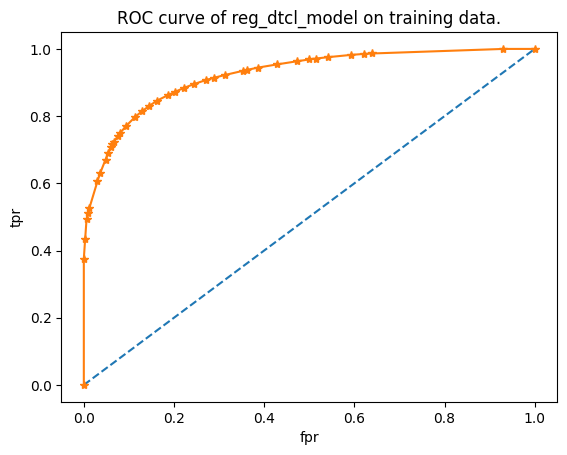

In [95]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of reg_dtcl_model on training data.')

In [96]:
# reg_dtcl_model prediction on test data

y_test_predict = reg_dtcl_model.predict(X_test)

In [97]:
# reg_dtcl_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,91,39
1,61,267


In [98]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65       130
           1       0.87      0.81      0.84       328

    accuracy                           0.78       458
   macro avg       0.74      0.76      0.74       458
weighted avg       0.79      0.78      0.79       458



In [99]:
y_test_predict_prob = reg_dtcl_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of reg_dtcl_model on test data: {}'.format(roc_score))

roc_auc_score of reg_dtcl_model on test data: 0.8270520637898687


Text(0.5, 1.0, 'ROC curve of reg_dtcl_model on test data.')

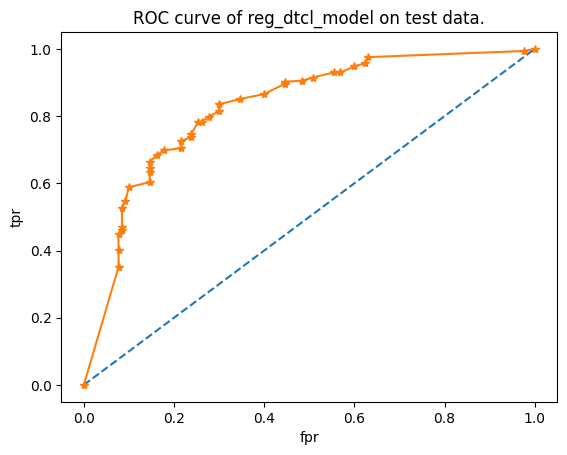

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of reg_dtcl_model on test data.')

**Training Set Performance:**
1. The regularized DecisionTreeClassifier model achieves an accuracy of 0.85 on the training set.
2. Class 0 metrics are moderate (precision=0.77, recall=0.76, F1-score=0.76), while Class 1 metrics are robust (precision=0.89, recall=0.90, F1-score=0.89),
3. The ROC AUC score is 0.92, demonstrating strong predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.78 .
2. Class 0 metrics are moderate (precision=0.60, recall=0.70, F1-score=0.65), while class 1 metrics are robust (precision=0.87, recall=0.81, F1-score=0.84).
3. The ROC AUC score is 0.83, demonstrating strong predictive power.

**Analysis:** The regularized DecisionTreeClassifier maintains consistent performance across training and test sets, suggesting good generalization capabilities. There is a drop in performance on the test set, particularly for class 0, indicating potential challenges in handling imbalanced data.


**Random Forest**

In [101]:
rfcl = RandomForestClassifier(random_state = 1)
rfcl.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [102]:
# rfcl model prediction on train data

y_train_predict = rfcl.predict(X_train)

In [103]:
# rfcl model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,331,1
1,0,735


In [104]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [105]:
y_train_predict_prob = rfcl.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of rfcl model on train data: {}'.format(roc_score))

roc_auc_score of rfcl model on train data: 0.999997950987624


Text(0.5, 1.0, 'ROC curve of rfcl model on training data.')

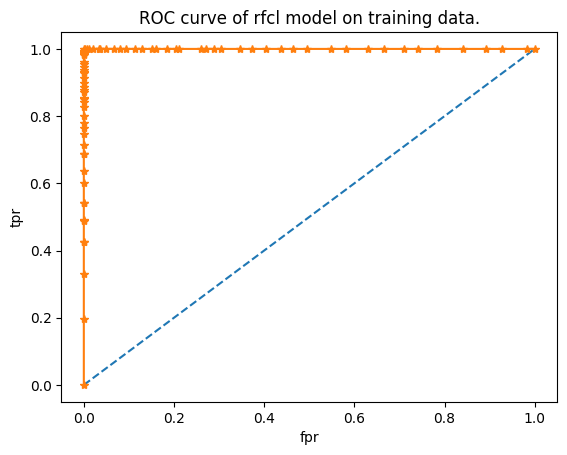

In [106]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of rfcl model on training data.')

In [107]:
# rfcl model prediction on test data

y_test_predict = rfcl.predict(X_test)

In [108]:
# rfcl model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,90,40
1,42,286


In [109]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [110]:
y_test_predict_prob = rfcl.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of rfcl model on test data: {}'.format(roc_score))

roc_auc_score of rfcl model on test data: 0.8873475609756096


Text(0.5, 1.0, 'ROC curve of rfcl model on test data.')

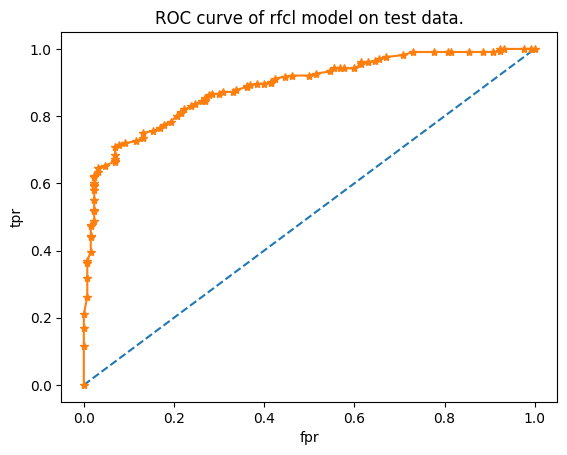

In [111]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of rfcl model on test data.')

**Training Set Performance:**

1. The RandomForestClassifier model achieves an accuracy of 1.00 on the training set.
2. Class 0 and Class1 metrics are exceptional (precision=1.00, recall=1.00, F1-score=1.00)
3. The ROC AUC score is 0.99, demonstrating exceptional predictive power.

**Test Set Performance:**

1. On the test set, the accuracy drops significantly at 0.82 .
2. Class 0 metrics are weak (precision=0.68, recall=0.69, F1-score=0.69), while class 1 metrics are robust (precision=0.88, recall=0.87, F1-score=0.87).
The ROC AUC score is 0.89, demonstrating strong predictive power.

**Analysis:** The RandomForestClassifier model exhibits stark contrast across training and test sets suggests overfitting, where the model learns the training data too well, including noise, and fails to generalize to new data particularly for class 0.

In [112]:
# Tuning the parameters of the rfcl for a regularized random forest classifier model for better performance.

'''
params = {
                'n_estimators' : [100, 125],
                'criterion': ['gini', 'entropy', 'log_loss'],
                'max_depth': [8, 10, 12],
                'min_samples_split': [9, 11, 15, 19],
                'min_samples_leaf':[7, 9, 11, 13],
                'max_features':[3, 4, 5]
}

grid_search = GridSearchCV(estimator = rfcl, param_grid = params, cv = 7, scoring ='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

reg_rfcl_model = grid_search.best_estimator_
'''

# Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 9, 'min_samples_split': 11, 'n_estimators': 100}


'\nparams = {\n                \'n_estimators\' : [100, 125],\n                \'criterion\': [\'gini\', \'entropy\', \'log_loss\'],\n                \'max_depth\': [8, 10, 12],\n                \'min_samples_split\': [9, 11, 15, 19],\n                \'min_samples_leaf\':[7, 9, 11, 13],\n                \'max_features\':[3, 4, 5]\n}\n\ngrid_search = GridSearchCV(estimator = rfcl, param_grid = params, cv = 7, scoring =\'accuracy\')\n\n# Fit the model\ngrid_search.fit(X_train, y_train)\n\n# Get the best parameters\nprint("Best Hyperparameters:", grid_search.best_params_)\n\nreg_rfcl_model = grid_search.best_estimator_\n'

In [113]:
# Regularized random forest model

reg_rfcl_model1 = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 3, min_samples_leaf = 9, min_samples_split = 11, n_estimators = 100, random_state = 1)
reg_rfcl_model1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=3,
                       min_samples_leaf=9, min_samples_split=11,
                       random_state=1)

In [114]:
# reg_rfcl_model1 prediction on train data

y_train_predict = reg_rfcl_model1.predict(X_train)

In [115]:
# reg_rfcl_model1 performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,237,95
1,55,680


In [116]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       332
           1       0.88      0.93      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.82      0.83      1067
weighted avg       0.86      0.86      0.86      1067



In [117]:
y_train_predict_prob = reg_rfcl_model1.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of reg_rfcl_model1 on train data: {}'.format(roc_score))

roc_auc_score of reg_rfcl_model1 on train data: 0.9340136054421769


Text(0.5, 1.0, 'ROC curve of reg_rfcl_model1 on training data.')

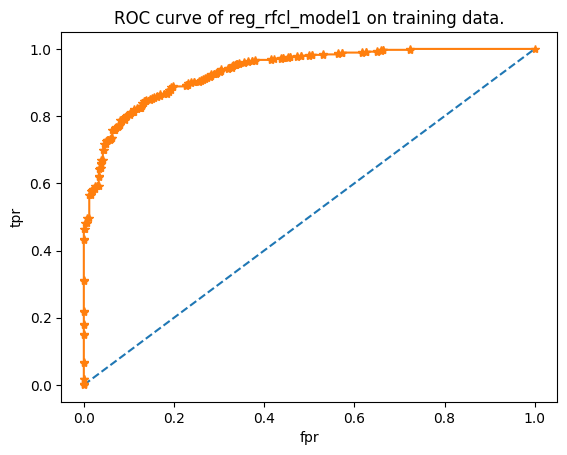

In [118]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of reg_rfcl_model1 on training data.')

In [119]:
# reg_rfcl_model1 prediction on test data

y_test_predict = reg_rfcl_model1.predict(X_test)

In [120]:
# reg_rfcl_model1 performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,91,39
1,36,292


In [121]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       130
           1       0.88      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



In [122]:
y_test_predict_prob = reg_rfcl_model1.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of reg_rfcl_model1 on test data: {}'.format(roc_score))

roc_auc_score of reg_rfcl_model1 on test data: 0.900703564727955


Text(0.5, 1.0, 'ROC curve of reg_rfcl_model1 on test data.')

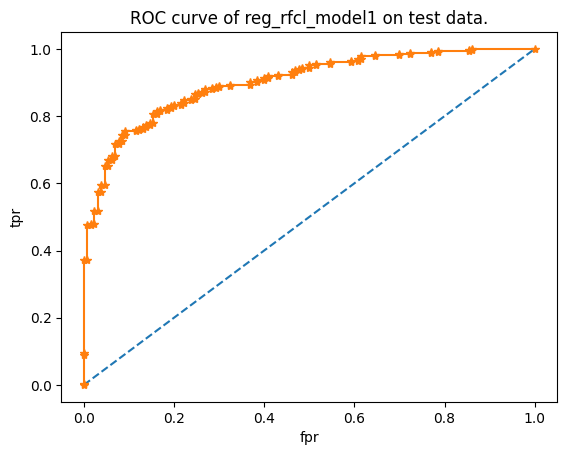

In [123]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of reg_rfcl_model1 on test data.')

**Training Set Performance:**
1. The regularized RandomForestClassifier model achieves an accuracy of 0.86 on the training set.
2. Class 0 metrics are strong (precision=0.81, recall=0.71, F1-score=0.76), while Class 1 metrics are robust (precision=0.88, recall=0.93, F1-score=0.90),
3. The ROC AUC score is 0.93, demonstrating strong predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.84 .
2. Class 0 metrics are moderate (precision=0.72, recall=0.70, F1-score=0.71), while class 1 metrics are robust (precision=0.88, recall=0.89, F1-score=0.89).
3. The ROC AUC score is 0.90, demonstrating strong predictive power.

**Analysis:** The regularized RandomForestClassifier maintains consistent performance across training and test sets, suggesting good generalization capabilities. There is a drop in performance on the test set, particularly for class 0, indicating challenges in handling imbalanced data.

**Bagging**

In [124]:
params = {
                'n_estimators' : [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
}

bgcl = BaggingClassifier(estimator = reg_rfcl_model1, random_state = 1)

grid_search = GridSearchCV(estimator = bgcl, param_grid = params, cv = 7, scoring ='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

bagging_model = grid_search.best_estimator_

# Best Hyperparameters: {'n_estimators': 25}

Best Hyperparameters: {'n_estimators': 25}


In [125]:
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                   max_depth=10, max_features=3,
                                                   min_samples_leaf=9,
                                                   min_samples_split=11,
                                                   random_state=1),
                  n_estimators=25, random_state=1)

In [126]:
# bagging_model prediction on train data

y_train_predict = bagging_model.predict(X_train)

In [127]:
# bagging_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,231,101
1,54,681


In [128]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       332
           1       0.87      0.93      0.90       735

    accuracy                           0.85      1067
   macro avg       0.84      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067



In [129]:
y_train_predict_prob = bagging_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of bagging_model on train data: {}'.format(roc_score))

roc_auc_score of bagging_model on train data: 0.921164248832063


Text(0.5, 1.0, 'ROC curve of bagging_model on training data.')

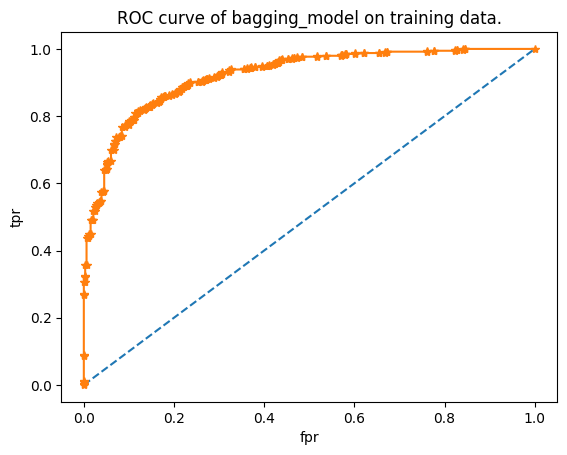

In [130]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of bagging_model on training data.')

In [131]:
# bagging_model prediction on test data

y_test_predict = bagging_model.predict(X_test)

In [132]:
# bagging_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,86,44
1,35,293


In [133]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.71      0.66      0.69       130
           1       0.87      0.89      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.78       458
weighted avg       0.82      0.83      0.83       458



In [134]:
y_test_predict_prob = bagging_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of bagging_model on test data: {}'.format(roc_score))

roc_auc_score of bagging_model on test data: 0.897889305816135


Text(0.5, 1.0, 'ROC curve of bagging_model on test data.')

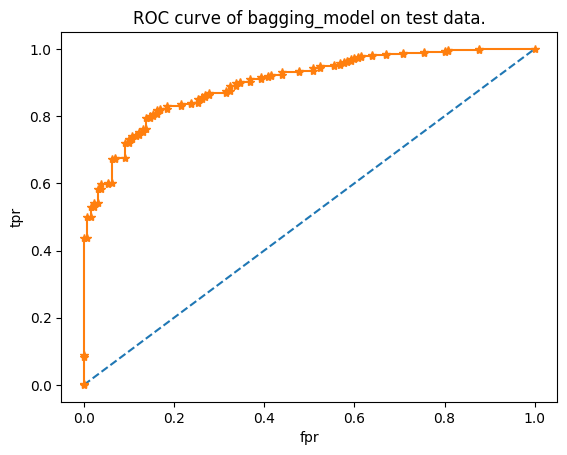

In [135]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of bagging_model on test data.')

**Training Set Performance:**
1. The BaggingClassifier model achieves an accuracy of 0.85 on the training set.
2. Class 0 metrics are moderate (precision=0.81, recall=0.70, F1-score=0.75), while Class 1 metrics are robust (precision=0.87, recall=0.93, F1-score=0.90),
3. The ROC AUC score is 0.92, demonstrating strong predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.83 .
2. Class 0 metrics are weak (precision=0.71, recall=0.66, F1-score=0.69), while class 1 metrics are robust (precision=0.87, recall=0.89, F1-score=0.88).
3. The ROC AUC score is 0.90, demonstrating strong predictive power.

**Analysis:** The BaggingClassifier maintains consistent performance across training and test sets, suggesting good generalization capabilities. There is a drop in performance on the test set, particularly for class 0, indicating challenges in handling imbalanced data.

**AdaBoostClassifier model**

In [136]:
params = {
                'n_estimators' : [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
}

adaboost_clf = AdaBoostClassifier(random_state = 1)

grid_search = GridSearchCV(estimator = adaboost_clf, param_grid = params, cv = 7, scoring ='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

adaboost_model = grid_search.best_estimator_

# Best Hyperparameters: {'n_estimators': 15}

Best Hyperparameters: {'n_estimators': 15}


In [137]:
# adaboost_model prediction on train data

y_train_predict = adaboost_model.predict(X_train)

In [138]:
# adaboost_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,222,110
1,69,666


In [139]:
print(classification_report(y_train, y_train_predict))


              precision    recall  f1-score   support

           0       0.76      0.67      0.71       332
           1       0.86      0.91      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [140]:
y_train_predict_prob = adaboost_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of adaboost_model on train data: {}'.format(roc_score))

roc_auc_score of adaboost_model on train data: 0.8842185066797804


Text(0.5, 1.0, 'ROC curve of adaboost_model on training data.')

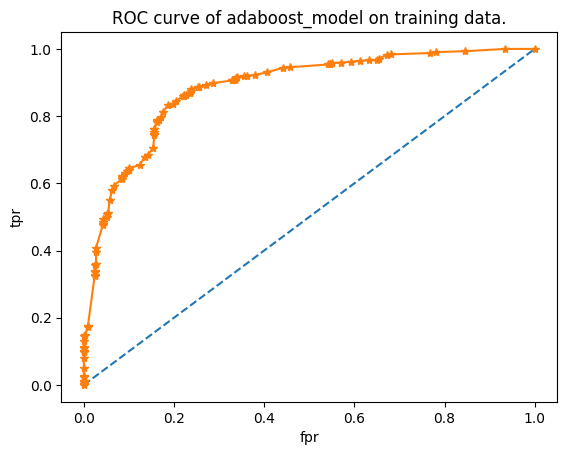

In [141]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of adaboost_model on training data.')

In [142]:
# adaboost_clf model prediction on test data

y_test_predict = adaboost_model.predict(X_test)

In [143]:
# adaboost_clf model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,82,48
1,36,292


In [144]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66       130
           1       0.86      0.89      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.76      0.77       458
weighted avg       0.81      0.82      0.81       458



In [145]:
y_test_predict_prob = adaboost_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of adaboost_clf model on test data: {}'.format(roc_score))

roc_auc_score of adaboost_clf model on test data: 0.884732645403377


Text(0.5, 1.0, 'ROC curve of adaboost_clf model on test data.')

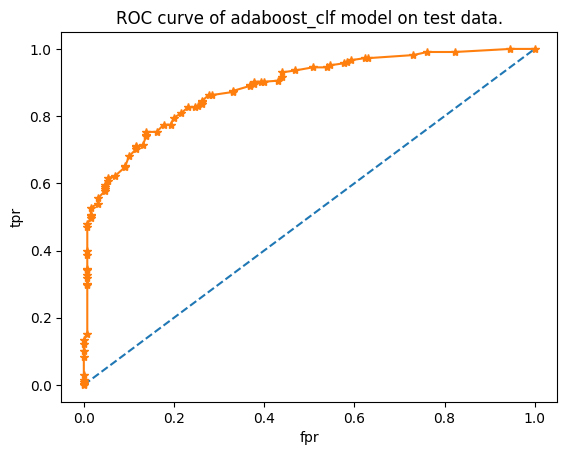

In [146]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of adaboost_clf model on test data.')

**Training Set Performance:**
1. The AdaBoostClassifier model achieves an accuracy of 0.83 on the training set.
2. Class 0 metrics are moderate (precision=0.76, recall=0.67, F1-score=0.71), while Class 1 metrics are robust (precision=0.86, recall=0.91, F1-score=0.88),
3. The ROC AUC score is 0.88, demonstrating strong predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.82 .
2. Class 0 metrics are weak (precision=0.69, recall=0.63, F1-score=0.66), while class 1 metrics are robust (precision=0.86, recall=0.89, F1-score=0.87).
3. The ROC AUC score is 0.88, demonstrating strong predictive power.

**Analysis:** The AdaBoostClassifier maintains consistent performance across training and test sets, suggesting good generalization capabilities. There is a drop in performance on the test set, particularly for class 0, indicating challenges in handling imbalanced data.

**GradientBoosting Classifier**

In [147]:
params = {
                'n_estimators' : [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
}

gradient_boost_clf = GradientBoostingClassifier(random_state = 1)

grid_search = GridSearchCV(estimator = gradient_boost_clf, param_grid = params, cv = 7, scoring ='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

grad_boost_model = grid_search.best_estimator_

# Best Hyperparameters: {'n_estimators': 60}

Best Hyperparameters: {'n_estimators': 60}


In [148]:
# grad_boost_model prediction on train data

y_train_predict = grad_boost_model.predict(X_train)

In [149]:
# grad_boost_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,252,80
1,52,683


In [150]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       332
           1       0.90      0.93      0.91       735

    accuracy                           0.88      1067
   macro avg       0.86      0.84      0.85      1067
weighted avg       0.87      0.88      0.87      1067



In [151]:
y_train_predict_prob = grad_boost_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of grad_boost_model on train data: {}'.format(roc_score))

roc_auc_score of grad_boost_model on train data: 0.9400397508400951


Text(0.5, 1.0, 'ROC curve of grad_boost_model on training data.')

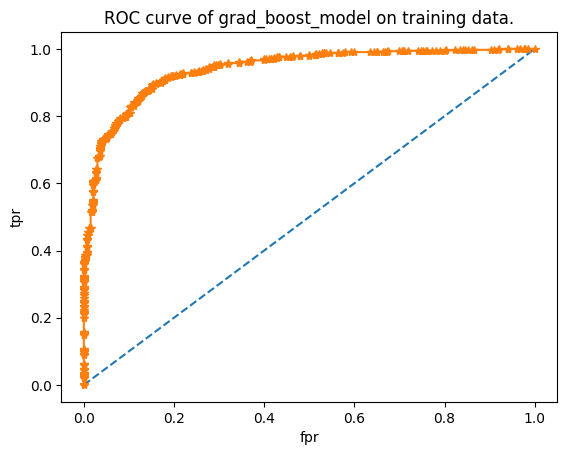

In [152]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of grad_boost_model on training data.')

In [153]:
# grad_boost_model prediction on test data

y_test_predict = grad_boost_model.predict(X_test)

In [154]:
# grad_boost_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,96,34
1,42,286


In [155]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.81      0.80       458
weighted avg       0.84      0.83      0.84       458



In [156]:
y_test_predict_prob = grad_boost_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of grad_boost_model on test data: {}'.format(roc_score))

roc_auc_score of grad_boost_model on test data: 0.907094277673546


Text(0.5, 1.0, 'ROC curve of grad_boost_model on test data.')

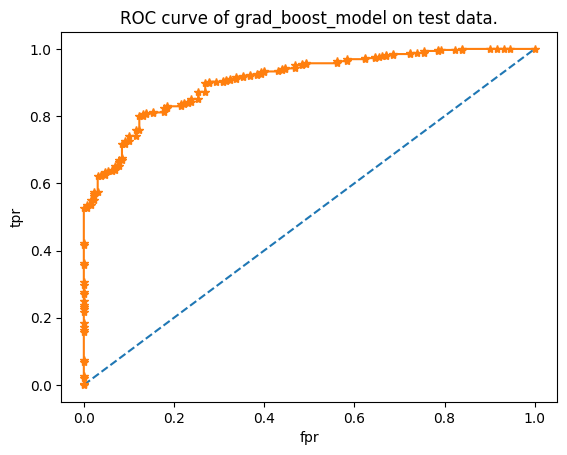

In [157]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of grad_boost_model on test data.')

**Training Set Performance:**
1. The GradientBoostingClassifier model achieves an accuracy of 0.88 on the training set.
2. Class 0 metrics are moderate (precision=0.83, recall=0.76, F1-score=0.79), while Class 1 metrics are robust (precision=0.90, recall=0.93, F1-score=0.91),
3. The ROC AUC score is 0.94, demonstrating strong predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.83.
2. Class 0 metrics are moderate (precision=0.70, recall=0.74, F1-score=0.72), while class 1 metrics are robust (precision=0.89, recall=0.87, F1-score=0.88).
3. The ROC AUC score is 0.90, demonstrating strong predictive power.

**Analysis:** The GradientBoostingClassifier maintains consistent performance across training and test sets, suggesting good generalization capabilities.There is a slight drop in performance on the test set, particularly for class 0, indicating challenges in handling imbalanced data.

**Logistic Regression & Linear Discrminant Analysis**

In [158]:
X = election_df[['age',	'economic.cond.national',	'economic.cond.household', 'Blair',	'Hague', 'Europe', 'political.knowledge', 'gender']]
y = election_df['vote']

X

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...
1520,67,5,3,2,4,11,3,1
1521,73,2,2,4,4,8,2,1
1522,37,3,3,5,4,2,2,1
1523,61,3,3,1,4,11,2,1


In [159]:
y

,vote
0,1
1,1
2,1
3,1
4,1
...,...
1520,0
1521,0
1522,1
1523,0


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

X_train

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1453,62,3,3,2,2,11,2,0
275,49,3,3,2,2,8,0,0
1130,74,4,4,4,4,7,0,1
1153,57,2,3,4,2,6,2,0
1172,24,4,5,4,4,6,0,1
...,...,...,...,...,...,...,...,...
715,67,4,3,5,2,2,2,1
905,27,5,5,2,1,4,3,1
1096,34,4,5,4,4,7,2,0
235,36,4,4,4,2,7,2,0


In [161]:
y_train

,vote
1453,1
275,0
1130,1
1153,1
1172,0
...,...
715,1
905,1
1096,1
235,1


In [162]:
X_test

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
91,49,1,1,2,4,8,3,0
1194,34,3,3,2,4,9,2,1
201,51,2,2,4,4,4,2,1
613,30,2,3,4,4,7,3,1
283,42,3,3,2,2,9,0,1
...,...,...,...,...,...,...,...,...
1196,46,3,4,5,2,3,2,0
205,45,4,4,4,2,11,3,1
1330,54,3,2,2,5,9,3,1
997,47,4,4,4,1,4,3,1


In [163]:
y_test

,vote
91,0
1194,1
201,1
613,0
283,1
...,...
1196,1
205,0
1330,0
997,1


In [164]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)

X_train

array([[ 0.47087709, -0.29551048, -0.15691394, ...,  1.30781894,
         0.4117562 , -0.95329201],
       [-0.35204544, -0.29551048, -0.15691394, ...,  0.39952464,
        -1.46578168, -0.95329201],
       [ 1.23049789,  0.82260896,  0.92326138, ...,  0.09675987,
        -1.46578168,  1.04899652],
       ...,
       [-1.30157144,  0.82260896,  2.00343669, ...,  0.09675987,
         0.4117562 , -0.95329201],
       [-1.17496798,  0.82260896,  0.92326138, ...,  0.09675987,
         0.4117562 , -0.95329201],
       [-1.42817491, -1.41362991, -1.23708926, ..., -0.50876966,
         1.35052513,  1.04899652]])

In [165]:
X_test = ss.transform(X_test)

X_test

array([[-0.35204544, -2.53174935, -2.31726458, ...,  0.39952464,
         1.35052513, -0.95329201],
       [-1.30157144, -0.29551048, -0.15691394, ...,  0.70228941,
         0.4117562 ,  1.04899652],
       [-0.22544197, -1.41362991, -1.23708926, ..., -0.81153443,
         0.4117562 ,  1.04899652],
       ...,
       [-0.03553677, -0.29551048, -1.23708926, ...,  0.70228941,
         1.35052513,  1.04899652],
       [-0.47864891,  0.82260896,  0.92326138, ..., -0.81153443,
         1.35052513,  1.04899652],
       [-1.74468358, -0.29551048,  0.92326138, ...,  0.70228941,
         0.4117562 , -0.95329201]])

In [166]:
# logistic regression

logistic_model = LogisticRegression(random_state = 1)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [167]:
# logistic_model prediction on train data

y_train_predict = logistic_model.predict(X_train)

In [168]:
# logistic_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,229,103
1,68,667


In [169]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [170]:
y_train_predict_prob = logistic_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of logistic_model on train data: {}'.format(roc_score))

roc_auc_score of logistic_model on train data: 0.8894209491025327


Text(0.5, 1.0, 'ROC curve of logistic_model on training data.')

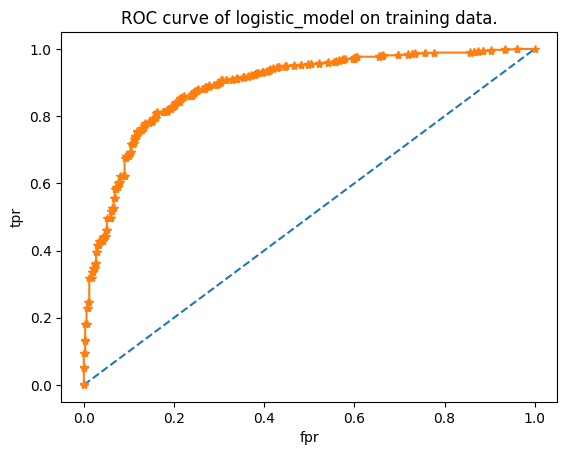

In [171]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of logistic_model on training data.')

In [172]:
# logistic_model prediction on test data

y_test_predict = logistic_model.predict(X_test)

In [173]:
# logistic_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,85,45
1,36,292


In [174]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [175]:
y_test_predict_prob = logistic_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of logistic_model on test data: {}'.format(roc_score))

roc_auc_score of logistic_model on test data: 0.8823874296435271


Text(0.5, 1.0, 'ROC curve of logistic_model on test data.')

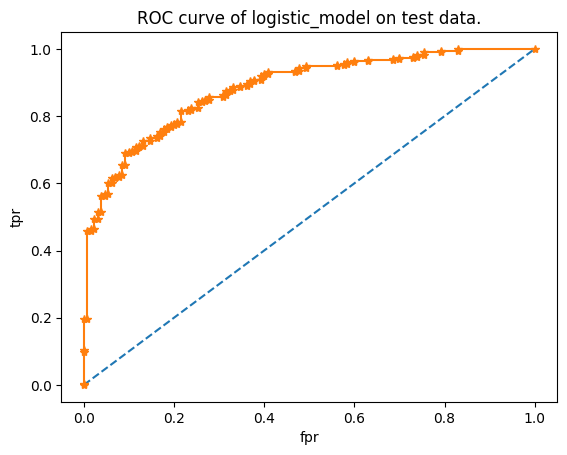

In [176]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of logistic_model on test data.')

In [177]:
for i, col in enumerate(X.columns):
  print('coefficient of {} : {}'.format(col, logistic_model.coef_[0][i]))

coefficient of age : -0.3228513673330366
coefficient of economic.cond.national : 0.30071472695893714
coefficient of economic.cond.household : 0.14679863897775342
coefficient of Blair : 0.6689115660296128
coefficient of Hague : -1.0163701695164915
coefficient of Europe : -0.7767091890522259
coefficient of political.knowledge : -0.5071312133962913
coefficient of gender : 0.14729551308827907


In a Logistic Regression model, the coefficients associated with each feature indicate the feature's impact on the log-odds of the outcome variable (in this case, the 'vote'). A positive coefficient suggests that an increase in the feature's value leads to an increase in the likelihood of voting for 'Labour' (since 'Labour' is encoded as 1), while a negative coefficient suggests the opposite.

*   **age: -0.3228513673330366:** Older voters are slightly less likely to vote for Labour.
*   **economic.cond.national: 0.30071472695893714:** Voters with a more positive view of the national economy are more likely to vote for Labour.
*   **economic.cond.household: 0.14679863897775342:** Voters with a more positive view of their household's economic condition are slightly more likely to vote for Labour.
*   **Blair: 0.6689115660296128:** A positive assessment of Blair (the Labour leader) at the time this data was collected  strongly correlates with a higher likelihood of voting for Labour.
*   **Hague: -1.0163701695164915:** A positive assessment of Hague (the Conservative leader) strongly correlates with a lower likelihood of voting for Labour (or, equivalently, a higher likelihood of voting Conservative). This is the strongest negative predictor.
*   **Europe: -0.7767091890522259:** Voters with a more positive view of European integration are less likely to vote for Labour .
*   **political.knowledge: -0.5071312133962913:** Voters with higher political knowledge are less likely to vote for Labour .
*   **gender: 0.14729551308827907:** Being male (encoded as 1) slightly increases the likelihood of voting for Labour compared to being female (encoded as 0).

**Training Set Performance:**
1. The LogisticRegression model achieves an accuracy of 0.84 on the training set.
2. Class 0 metrics are moderate (precision=0.77, recall=0.69, F1-score=0.73), while Class 1 metrics are robust (precision=0.87, recall=0.91, F1-score=0.89),
3. The ROC AUC score is 0.89, demonstrating strong predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.82.
2. Class 0 metrics are weak (precision=0.70, recall=0.65, F1-score=0.68), while class 1 metrics are robust (precision=0.87, recall=0.89, F1-score=0.88).
3. The ROC AUC score is 0.88, demonstrating strong predictive power.

**Analysis:** The LogisticRegression maintains consistent performance across training and test sets, suggesting good generalization capabilities. There is a drop in performance on the test set, particularly for class 0, indicating challenges in handling imbalanced data.

In [178]:
# Linear Discriminant Analysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [179]:
# lda_model prediction on train data

y_train_predict = lda_model.predict(X_train)

In [180]:
# lda_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,233,99
1,75,660


In [181]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



In [182]:
y_train_predict_prob = lda_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of lda_model on train data: {}'.format(roc_score))

roc_auc_score of lda_model on train data: 0.8892242439144332


Text(0.5, 1.0, 'ROC curve of lda_model on training data.')

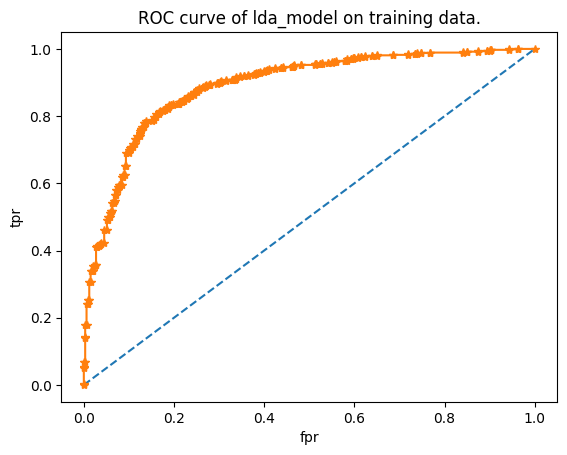

In [183]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of lda_model on training data.')

In [184]:
# lda_model prediction on test data

y_test_predict = lda_model.predict(X_test)

In [185]:
# lda_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,86,44
1,39,289


In [186]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [187]:
y_test_predict_prob = lda_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of lda_model on test data: {}'.format(roc_score))

roc_auc_score of lda_model on test data: 0.8837711069418386


Text(0.5, 1.0, 'ROC curve of lda_model on test data.')

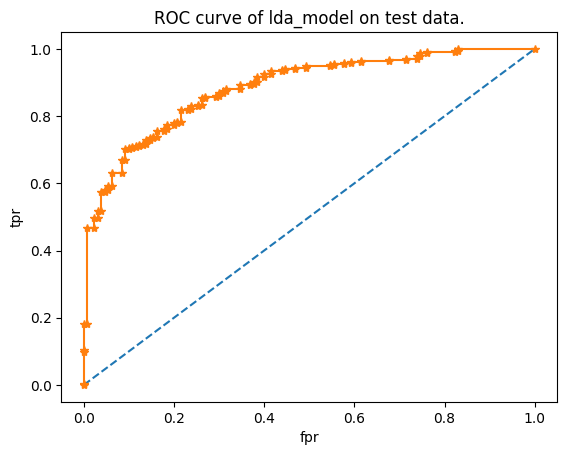

In [188]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of lda_model on test data.')

In [189]:
for i, col in enumerate(X.columns):
  print('coefficient of {} : {}'.format(col, lda_model.coef_[0][i]))


intercept = lda_model.intercept_
print('\n\nIntercept: ', intercept)

coefficient of age : -0.4047553954645554
coefficient of economic.cond.national : 0.31231620465860266
coefficient of economic.cond.household : 0.13918749759953544
coefficient of Blair : 0.8267568129082024
coefficient of Hague : -1.1852921441817834
coefficient of Europe : -0.8540068585361493
coefficient of political.knowledge : -0.609673855513653
coefficient of gender : 0.1243986678892362


Intercept:  [1.40398939]


In Linear Discriminant Analysis (LDA), the coefficients associated with each feature reflect the feature's contribution to the discriminant function, which is used to separate the classes . These coefficients indicate the magnitude and direction of each feature's effect on distinguishing between the classes.

*   **age: -0.4047553954645554:** Older voters are less likely to vote for Labour.
*   **economic.cond.national: 0.31231620465860266:** Voters with a more positive view of the national economy are more likely to vote for Labour.
*   **economic.cond.household: 0.13918749759953544:** Voters with a more positive view of their household's economic condition are slightly more likely to vote for Labour.
*   **Blair: 0.8267568129082024:** A positive assessment of Blair (the Labour leader) strongly correlates with a higher likelihood of voting for Labour.
*   **Hague: -1.1852921441817834:** A positive assessment of Hague (the Conservative leader) strongly correlates with a lower likelihood of voting for Labour, indicating a higher likelihood of voting Conservative. This is a strong negative predictor.
*   **Europe: -0.8540068585361493:** Voters with a more positive view of European integration are less likely to vote for Labour.
*   **political.knowledge: -0.609673855513653:** Voters with higher political knowledge are less likely to vote for Labour.
*   **gender: 0.1243986678892362:** Being male (encoded as 1) slightly increases the likelihood of voting for Labour.

In **Linear Discriminant Analysis (LDA)**, the **intercept** is a constant term in the decision function that shifts the decision boundary. It represents the value of the discriminant function when all the features are zero.

The **intercept** for the regularized LDA model as **1.42**. The **intercept** helps to calibrate the model's predictions, influencing the overall classification threshold.

In [190]:
lda_model.explained_variance_ratio_

array([1.])

**Training Set Performance:**
1. The LinearDiscriminantAnalysis model achieves an accuracy of 0.84 on the training set.
2. Class 0 metrics are moderate (precision=0.76, recall=0.70, F1-score=0.73), while Class 1 metrics are robust (precision=0.87, recall=0.90, F1-score=0.88),
3. The ROC AUC score is 0.89, demonstrating strong predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.82.
2. Class 0 metrics are weak (precision=0.69, recall=0.66, F1-score=0.67), while class 1 metrics are robust (precision=0.87, recall=0.88, F1-score=0.87).
3. The ROC AUC score is 0.88, demonstrating strong predictive power.

**Analysis:** The LinearDiscriminantAnalysis maintains consistent performance across training and test sets, suggesting good generalization capabilities. There is a drop in performance on the test set, particularly for class 0, indicating challenges in handling imbalanced data.

In [191]:
# Performing model tuning using GridSearchCV

params = {'solver': ['lsqr', 'eigen'],
          'tol': [0.1, 0.001, 0.0001],
          'shrinkage': ['auto']}

grid_search = GridSearchCV(estimator = lda_model, param_grid = params, cv = 7, scoring ='accuracy')

grid_search.fit(X_train, y_train)

print('Best parameters: ', grid_search.best_params_,'\n')

print('Estimator: ', grid_search.best_estimator_)

reg_lda_model = grid_search.best_estimator_

Best parameters:  {'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.1} 

Estimator:  LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.1)


In [192]:
# reg_lda_model prediction on train data

y_train_predict = reg_lda_model.predict(X_train)

In [193]:
# reg_lda_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,238,94
1,76,659


In [194]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       332
           1       0.88      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [195]:
y_train_predict_prob = reg_lda_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of reg_lda_model on train data: {}'.format(roc_score))

roc_auc_score of reg_lda_model on train data: 0.8895111056470781


Text(0.5, 1.0, 'ROC curve of reg_lda_model on training data.')

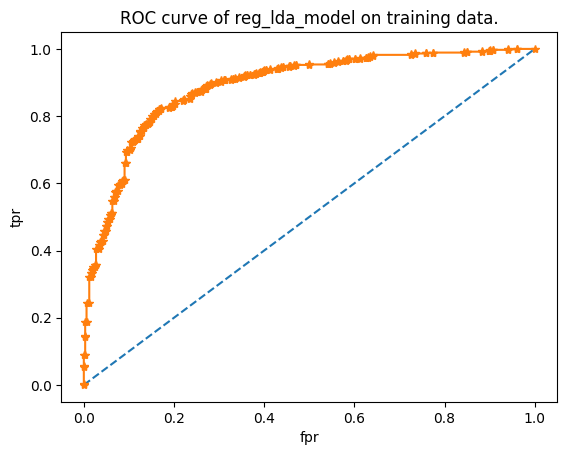

In [196]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of reg_lda_model on training data.')

In [197]:
# reg_lda_model prediction on test data

y_test_predict = reg_lda_model.predict(X_test)


In [198]:
# reg_lda_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,89,41
1,40,288


In [199]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [200]:
y_test_predict_prob = reg_lda_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of reg_lda_model on test data: {}'.format(roc_score))

roc_auc_score of reg_lda_model on test data: 0.8852720450281425


Text(0.5, 1.0, 'ROC curve of reg_lda_model on test data.')

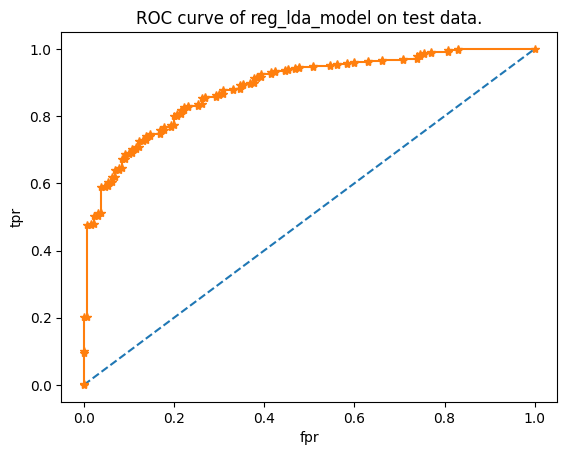

In [201]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of reg_lda_model on test data.')

In [202]:
for i, col in enumerate(X.columns):
  print('coefficient of {} : {}'.format(col, reg_lda_model.coef_[0][i]))


intercept = reg_lda_model.intercept_
print('\n\nIntercept: ', intercept)

coefficient of age : -0.3919403578987458
coefficient of economic.cond.national : 0.36268331672343207
coefficient of economic.cond.household : 0.1592505546956438
coefficient of Blair : 0.8516336041309318
coefficient of Hague : -1.1977281585684707
coefficient of Europe : -0.886348150082236
coefficient of political.knowledge : -0.5968946748481506
coefficient of gender : 0.10710602373164653


Intercept:  [1.42176204]


In Linear Discriminant Analysis (LDA), the coefficients associated with each feature reflect the feature's contribution to the discriminant function, which is used to separate the classes . These coefficients indicate the magnitude and direction of each feature's effect on distinguishing between the classes.

Based on the provided text, here's an interpretation of the coefficients in the LDA model:

*   **age: -0.3919403578987458:** Older voters are less likely to vote for Labour .
*   **economic.cond.national: 0.36268331672343207:** Voters with a more positive view of the national economy are more likely to vote for Labour .
*   **economic.cond.household: 0.1592505546956438:** Voters with a more positive view of their household's economic condition are slightly more likely to vote for Labour .
*   **Blair: 0.8516336041309318:** A positive assessment of Blair (the Labour leader) strongly correlates with a higher likelihood of voting for Labour .
*   **Hague: -1.1977281585684707:** A positive assessment of Hague (the Conservative leader) strongly correlates with a lower likelihood of voting for Labour, indicating a higher likelihood of voting Conservative . This is a strong negative predictor.
*   **Europe: -0.886348150082236:** Voters with a more positive view of European integration are less likely to vote for Labour .
*   **political.knowledge: -0.5968946748481506:** Voters with higher political knowledge are less likely to vote for Labour .
*   **gender: 0.10710602373164653:** Being male (encoded as 1) slightly increases the likelihood of voting for Labour .

In **Linear Discriminant Analysis (LDA)**, the **intercept** is a constant term in the decision function that shifts the decision boundary. It represents the value of the discriminant function when all the features are zero.

The **intercept** for the regularized LDA model as **1.42**. The **intercept** helps to calibrate the model's predictions, influencing the overall classification threshold.


**Training Set Performance:**
1. The regularized LinearDiscriminantAnalysis model achieves an accuracy of 0.84 on the training set.
2. Class 0 metrics are moderate (precision=0.76, recall=0.72, F1-score=0.74), while Class 1 metrics are robust (precision=0.88, recall=0.90, F1-score=0.89),
3. The ROC AUC score is 0.89, demonstrating strong predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.82.
2. Class 0 metrics are weak (precision=0.69, recall=0.68, F1-score=0.69), while class 1 metrics are robust (precision=0.88, recall=0.88, F1-score=0.88).
3. The ROC AUC score is 0.89, demonstrating strong predictive power.

**Analysis:** The regularized LinearDiscriminantAnalysis maintains consistent performance across training and test sets, suggesting good generalization capabilities. There is a drop in performance on the test set, particularly for class 0, indicating challenges in handling imbalanced data.

**Artificial Neural Network**

In [203]:
X = election_df[['age',	'economic.cond.national',	'economic.cond.household', 'Blair',	'Hague', 'Europe', 'political.knowledge',	'gender']]
y = election_df['vote']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 121)

In [204]:
mlp_model = MLPClassifier(random_state = 121)
mlp_model.fit(X_train, y_train)

MLPClassifier(random_state=121)

In [205]:
# mlp_model prediction on train data

y_train_predict = mlp_model.predict(X_train)

In [206]:
# mlp_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,212,104
1,62,689


In [207]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       316
           1       0.87      0.92      0.89       751

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [208]:
y_train_predict_prob = mlp_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of mlp_model on train data: {}'.format(roc_score))

roc_auc_score of mlp_model on train data: 0.9136004314921876


Text(0.5, 1.0, 'ROC curve of mlp_model on training data.')

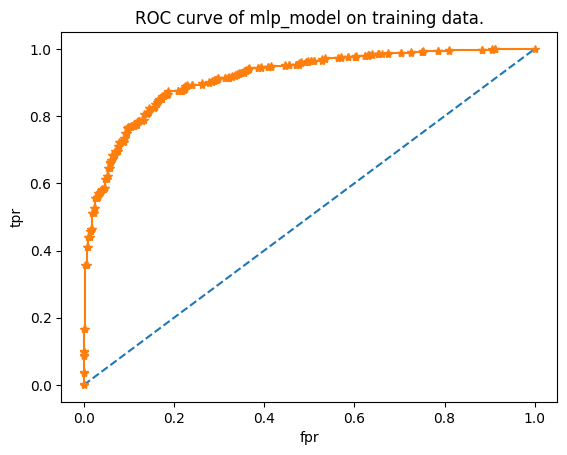

In [209]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of mlp_model on training data.')

In [210]:
# mlp_model prediction on test data

y_test_predict = mlp_model.predict(X_test)

In [211]:
# mlp_model performance on train data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,88,58
1,31,281


In [212]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.74      0.60      0.66       146
           1       0.83      0.90      0.86       312

    accuracy                           0.81       458
   macro avg       0.78      0.75      0.76       458
weighted avg       0.80      0.81      0.80       458



In [213]:
y_test_predict_prob = mlp_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of mlp_model on test data: {}'.format(roc_score))

roc_auc_score of mlp_model on test data: 0.8877327010888654


Text(0.5, 1.0, 'ROC curve of mlp_model on test data.')

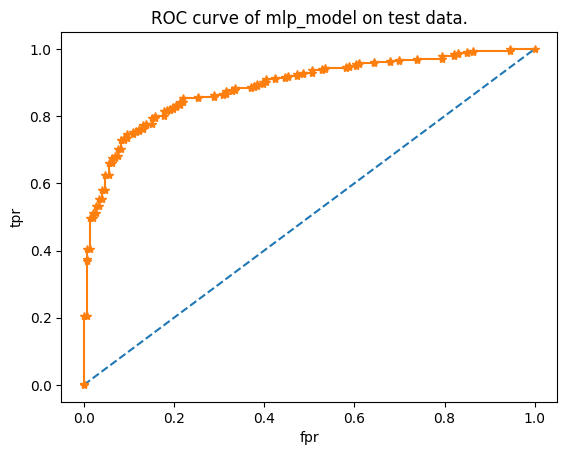

In [214]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of mlp_model on test data.')

**Training Set Performance:**
1. The MLPClassifier model achieves an accuracy of 0.84 on the training set.
2. Class 0 metrics are moderate (precision=0.77, recall=0.67, F1-score=0.72), while Class 1 metrics are robust (precision=0.87, recall=0.92, F1-score=0.89),
3. The ROC AUC score is 0.91, demonstrating strong predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.81.
2. Class 0 metrics are weak (precision=0.74, recall=0.60, F1-score=0.66), while class 1 metrics are robust (precision=0.83, recall=0.90, F1-score=0.86).
3. The ROC AUC score is 0.89, demonstrating strong predictive power.

**Analysis:** The MLPClassifier model maintains consistent performance across training and test sets, suggesting good generalization capabilities. There is a drop in performance on the test set, particularly for class 0, indicating challenges in handling imbalanced data.

In [215]:
# Tuning the parameters of the mlp_model for better performance.

params = {
    'hidden_layer_sizes': [(100), (150), (100, 50), (150, 75), (100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
		'learning_rate_init': [0.1, 0.001, 0.0001],
    'tol': [0.1, 0.01, 0.001],
    'max_iter' : [1000, 4000, 7000, 10000],
		'early_stopping':[True, False]
}

grid_search = GridSearchCV(estimator = mlp_model, param_grid = params, cv = 5, scoring = 'accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

reg_mlp_model = grid_search.best_estimator_


# Best Hyperparameters: {'activation': 'logistic', 'early_stopping': False, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate_init': 0.001, 'max_iter': 1000, 'solver': 'adam', 'tol': 0.001}

Best Hyperparameters: {'activation': 'logistic', 'early_stopping': False, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate_init': 0.001, 'max_iter': 1000, 'solver': 'adam', 'tol': 0.001}


In [216]:
# reg_mlp_model prediction on train data

y_train_predict = reg_mlp_model.predict(X_train)

In [217]:
# reg_mlp_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,228,88
1,80,671


In [218]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       316
           1       0.88      0.89      0.89       751

    accuracy                           0.84      1067
   macro avg       0.81      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [219]:
y_train_predict_prob = reg_mlp_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of reg_mlp_model on train data: {}'.format(roc_score))

roc_auc_score of reg_mlp_model on train data: 0.900554534881761


Text(0.5, 1.0, 'ROC curve of reg_mlp_model on training data.')

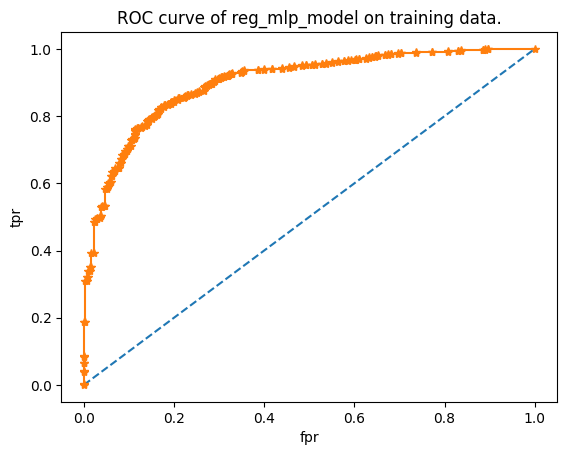

In [220]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of reg_mlp_model on training data.')

In [221]:
# reg_mlp_model prediction on test data

y_test_predict = reg_mlp_model.predict(X_test)

In [222]:
# reg_mlp_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,96,50
1,34,278


In [223]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       146
           1       0.85      0.89      0.87       312

    accuracy                           0.82       458
   macro avg       0.79      0.77      0.78       458
weighted avg       0.81      0.82      0.81       458



In [224]:
y_test_predict_prob = reg_mlp_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of reg_mlp_model on test data: {}'.format(roc_score))

roc_auc_score of reg_mlp_model on test data: 0.875812258517738


Text(0.5, 1.0, 'ROC curve of reg_mlp_model on test data.')

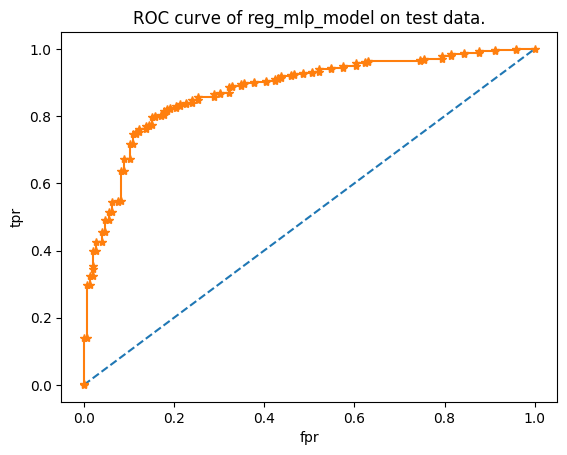

In [225]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of reg_mlp_model on test data.')

**Training Set Performance:**
1. The regularized MLPClassifier model achieves an accuracy of 0.84 on the training set.
2. Class 0 metrics are moderate (precision=0.74, recall=0.72, F1-score=0.73), while Class 1 metrics are robust (precision=0.88, recall=0.89, F1-score=0.89),
3. The ROC AUC score is 0.90, demonstrating strong predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.82.
2. Class 0 metrics are moderate (precision=0.74, recall=0.66, F1-score=0.70), while class 1 metrics are robust (precision=0.85, recall=0.89, F1-score=0.87).
3. The ROC AUC score is 0.88, demonstrating strong predictive power.

**Analysis:** The regularized MLPClassifier model maintains consistent performance across training and test sets, suggesting good generalization capabilities.

**Best Model:**

---

Based on the provided classification reports and analyses, the **GradientBoostingClassifier (grad_boost_model)** appears to be the best model for this classification task.

Here's the reasoning:

1.  **High Discrimination Ability (ROC AUC):**
* The GradientBoostingClassifier achieves the highest ROC AUC score on the test data (0.91), indicating the best overall ability to distinguish between the two classes.
* This surpasses the Regularized RandomForestClassifier (0.90)  and other models like GaussianNB (0.88), LogisticRegression (0.88), LDA (0.88), MLP (0.89) and Regularized MLP (0.88).

2.  **Strong Performance on Minority Class (Class 0):**
* Many models showed weaker performance specifically for Class 0 on the test set.
* The GradientBoostingClassifier achieves the highest F1-score for Class 0 on the test set (0.72).
* This is slightly better than the Regularized RandomForestClassifier (0.71) and notably better than several others like Regularized KNN (0.66) or LDA (0.67).
* A higher F1-score for the minority class is crucial in imbalanced datasets.

3.  **Good Accuracy and Generalization:**
* While the Regularized RandomForestClassifier has slightly higher test accuracy (0.84 vs. 0.83), the GradientBoostingClassifier maintains good accuracy and shows reasonable generalization, with training accuracy at 0.88 and test accuracy at 0.83.
* This gap is acceptable and indicates it's not severely overfitting.

While the Regularized RandomForestClassifier is a very close second with the highest accuracy, the GradientBoostingClassifier's superior performance in ROC AUC and specifically on the harder-to-predict Class 0 gives it a slight edge as the most robust model for this specific dataset and classification problem.